# Projet Kit Data Science 

In [144]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import os
import urllib.request
import datetime
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import geopandas
import re 
#from cartopy import crs as ccrs
import cartopy.crs as ccrs
import math

## Récupération des données 

Les données du Vendée Globe sont disponibles via le site: https://www.vendeeglobe.org/fr


In [145]:
url = 'https://www.vendeeglobe.org'

### Récupération des skippers et des voiliers en lice 

Liste des skippers : https://www.vendeeglobe.org/fr

In [146]:
#--------Récupération des balises HTML--------#
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [147]:
skippers = []
boats = []
for span_tag_skippers in soup.findAll('span', attrs={'class': 'skippers__name'}): 
    skippers.append(span_tag_skippers.text)
    
for span_tag_boats in soup.findAll('span', attrs={'class': 'skippers__boat'}):
    boats.append(span_tag_boats.text)

In [148]:
#liste des skippers en compétition 
print(skippers)

['Fabrice AMEDEO', 'Romain ATTANASIO', 'Alexia BARRIER', 'Yannick BESTAVEN', 'Jérémie BEYOU', 'Arnaud BOISSIÈRES', 'Louis BURTON', 'Didac COSTA', 'Manuel COUSIN', 'Clarisse CREMER', 'Charlie DALIN', 'Sam DAVIES', 'Sébastien DESTREMAU', 'Benjamin DUTREUX', 'Kevin ESCOFFIER', 'Clément GIRAUD', 'Pip HARE', 'Boris HERRMANN', 'Ari HUUSELA', 'Isabelle JOSCHKE', 'Jean LE CAM', 'Stéphane LE DIRAISON', 'Miranda MERRON', 'Giancarlo PEDOTE', 'Alan  ROURA', 'Thomas RUYANT', 'Damien SEGUIN', 'Kojiro SHIRAISHI', 'Sébastien SIMON', 'Maxime SOREL', 'Alex THOMSON', 'Armel TRIPON', 'Nicolas TROUSSEL']


In [149]:
#liste des bateaux en liste 
print(boats)

['NEWREST - ART & FENÊTRES', 'PURE - Best Western®', 'TSE -  4MYPLANET', 'Maître CoQ IV', 'CHARAL', 'LA MIE CÂLINE - ARTISANS ARTIPÔLE', 'BUREAU VALLEE 2', 'ONE PLANET ONE OCEAN', 'GROUPE SÉTIN', 'BANQUE POPULAIRE X', 'APIVIA', 'INITIATIVES-COEUR', 'MERCI', 'OMIA - WATER FAMILY ', 'PRB', 'Compagnie du Lit / Jiliti', 'MEDALLIA', 'SEAEXPLORER - YACHT CLUB DE MONACO', 'STARK', 'MACSF', 'Yes We Cam!', 'TIME FOR OCEANS', 'CAMPAGNE DE FRANCE', 'PRYSMIAN GROUP', 'LA FABRIQUE', 'LinkedOut', 'GROUPE APICIL', 'DMG MORI Global One', 'ARKEA PAPREC', 'V and B-MAYENNE', 'HUGO BOSS', "L'OCCITANE EN PROVENCE", "CORUM L'EPARGNE"]


In [150]:
couple = {}
for i in range(len(skippers)): 
    if skippers[i] == 'Sam DAVIES':
        couple ['Samantha davies'] = boats[i].capitalize()
    elif skippers[i] == 'Alan  ROURA':
        couple ['Alan roura'] = boats[i].capitalize()
    else: 
        couple [skippers[i].capitalize()] = boats[i].capitalize()

In [151]:
for skipper, boat in couple.items(): 
    print('Le skipper', skipper, 'est associé au voilier', boat)

Le skipper Fabrice amedeo est associé au voilier Newrest - art & fenêtres
Le skipper Romain attanasio est associé au voilier Pure - best western®
Le skipper Alexia barrier est associé au voilier Tse -  4myplanet
Le skipper Yannick bestaven est associé au voilier Maître coq iv
Le skipper Jérémie beyou est associé au voilier Charal
Le skipper Arnaud boissières est associé au voilier La mie câline - artisans artipôle
Le skipper Louis burton est associé au voilier Bureau vallee 2
Le skipper Didac costa est associé au voilier One planet one ocean
Le skipper Manuel cousin est associé au voilier Groupe sétin
Le skipper Clarisse cremer est associé au voilier Banque populaire x
Le skipper Charlie dalin est associé au voilier Apivia
Le skipper Samantha davies est associé au voilier Initiatives-coeur
Le skipper Sébastien destremau est associé au voilier Merci
Le skipper Benjamin dutreux est associé au voilier Omia - water family 
Le skipper Kevin escoffier est associé au voilier Prb
Le skipper Cl

### Récupération des fiches techniques pour chacun des voiliers 

In [152]:
#--------Récupération des url des différents skippers -------#
 
url_data_skippers = []
for a_tag_skippers in soup.findAll('a', attrs={'class': 'skippers__slide'}): 
    url_data_skippers.append(a_tag_skippers.attrs['href'])

In [153]:
print(url_data_skippers)

['/fr/skippers/93/fabrice-amedeo', '/fr/skippers/110/romain-attanasio', '/fr/skippers/100/alexia-barrier', '/fr/skippers/91/yannick-bestaven', '/fr/skippers/103/jeremie-beyou', '/fr/skippers/88/arnaud-boissieres', '/fr/skippers/106/louis-burton', '/fr/skippers/123/didac-costa', '/fr/skippers/92/manuel-cousin', '/fr/skippers/95/clarisse-cremer', '/fr/skippers/105/charlie-dalin', '/fr/skippers/97/sam-davies', '/fr/skippers/117/sebastien-destremau', '/fr/skippers/112/benjamin-dutreux', '/fr/skippers/89/kevin-escoffier', '/fr/skippers/114/clement-giraud', '/fr/skippers/120/pip-hare', '/fr/skippers/109/boris-herrmann', '/fr/skippers/124/ari-huusela', '/fr/skippers/102/isabelle-joschke', '/fr/skippers/116/jean-le-cam', '/fr/skippers/94/stephane-le-diraison', '/fr/skippers/104/miranda-merron', '/fr/skippers/96/giancarlo-pedote', '/fr/skippers/99/alan-roura', '/fr/skippers/113/thomas-ruyant', '/fr/skippers/111/damien-seguin', '/fr/skippers/119/kojiro-shiraishi', '/fr/skippers/90/sebastien-simo

Les URL des différents skippers, nous permettent d'accéder aux différentes fiches techniques des voiliers associés à ces skippers. 

In [154]:
r = requests.get(url + url_data_skippers[0])
soup = BeautifulSoup(r.content)
test = soup.find('ul', {'class': "skipper-boat-list__specs-list l-unlist"})

#-----Récupération des caractéristiques définissant chaque navire---#
boat_features = []

for li_tag in test.find_all('li'): 
    index = li_tag.text.find(':')
    boat_features.append(li_tag.text[ :index - 1])

print(boat_features)

['Numéro de voile', 'Anciens noms du bateau', 'Architecte', 'Chantier', 'Date de lancement', 'Longueur', 'Largeur', "Tirant d'eau", 'Déplacement (poids)', 'Nombre de dérives', 'Hauteur mât', 'Voile quille', 'Surface de voiles au près', 'Surface de voiles au portant']


In [155]:
#--------Récupération des caractéristiques spécifiques des voiliers-------#
dico_boat_features = {}

for url_skipper in url_data_skippers:
    
    url_skipper_total =  url + url_skipper
    r = requests.get(url_skipper_total)
    soup = BeautifulSoup(r.content)
    test = soup.find('ul', {'class': "skipper-boat-list__specs-list l-unlist"})
    specific_boat_features = []
    cpt =0
    for li_tag in test.find_all('li'): 
        
        
        
        index = li_tag.text.find(':')
        if (li_tag.text[ :index-1] != boat_features[cpt]):
            specific_boat_features.append(np.nan)
            cpt = cpt + 1
            
        specific_boat_features.append(li_tag.text[index + 2 : ].lower())
        cpt = cpt + 1
        
    nom = soup.find('p', {'class': "skipper-boat-list__title"})
    dico_boat_features[nom.text] = specific_boat_features
    

In [156]:
df_boats_features = pd.DataFrame(dico_boat_features, index = boat_features)

In [157]:
df_new_line = pd.DataFrame([skippers], columns =  boats, index = ['Skipper'])

In [158]:
df_boats_features = pd.concat([df_boats_features,df_new_line])

In [159]:
#Fiches techniques des différents voiliers dans un dataframe
df_boats_features

,NEWREST - ART & FENÊTRES,PURE - Best Western®,TSE - 4MYPLANET,Maître CoQ IV,CHARAL,LA MIE CÂLINE - ARTISANS ARTIPÔLE,BUREAU VALLEE 2,ONE PLANET ONE OCEAN,GROUPE SÉTIN,BANQUE POPULAIRE X,...,PRYSMIAN GROUP,LA FABRIQUE,LinkedOut,GROUPE APICIL,DMG MORI Global One,ARKEA PAPREC,V and B-MAYENNE,HUGO BOSS,L'OCCITANE EN PROVENCE,CORUM L'EPARGNE
Numéro de voile,fra 56,fra 49,fra72,17,08,fra 14,18,esp 33,fra 71,fra30,...,ita 06,sui07,NaN,fra1000,jpn 11,4,fra53,gbr 99,2,fra 6
Anciens noms du bateau,"no way back, vento di sardegna","gitana eighty, synerciel, newrest-matmut","famille mary-etamine du lys, initiatives coeur...",safran 2 - des voiles et vous,NaN,"ecover3, président, gamesa, kilcullen voyager-...",banque populaire viii,kingfisher - educacion sin fronteras - forum m...,"paprec-virbac2, estrella damm, we are water, l...",macif - sma,...,saint-michel - virbac,"brit air, votre nom autour du monde, macsf",verdier,"comme un seul homme, dcns",NaN,NaN,"le souffle du nord, groupe bel",NaN,NaN,NaN
Architecte,vplp/verdier,bruce farr design,marc lombard,verdier - vplp,vplp,owen clarke design llp - clay oliver,verdier - vplp,owen clarke design,bruce farr yacht design,verdier - vplp,...,vplp - verdier,groupe finot-conq,NaN,groupe finot-conq,vplp,juan kouyoumdjian,verdier - vplp,vplp - alex thomson racing (led by pete hobson),samuel manuard,juan kouyoumdjian
Chantier,persico marine,southern ocean marine (nouvelle zélande),mag france,cdk technologies,cdk technologies,hakes marine - mer agitée,cdk technologies,martens yachts,southern ocean marine (nouvelle-zélande),cdk - mer agitée,...,multiplast,multiplast,persico,multiplast,multiplast,cdk technologies / assemblage : team arkea paprec,"indiana yachting (scarlino, italie)",carrington boats,black pepper©,cdk technologies - mer agitée
Date de lancement,01 août 2015,08 mars 2007,01 mars 1998,12 mars 2015,18 août 2018,03 août 2007,09 juin 2015,02 février 2000,02 février 2007,01 mars 2011,...,02 avril 2015,01 août 2007,03 septembre 2019,10 août 2008,05 septembre 2019,19 juillet 2019,07 septembre 2007,15 août 2019,31 janvier 2020,15 mai 2020
Longueur,"18,28 m","18,28m","18,28m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m",...,"18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m","18,28 m"
Largeur,"5,85 m","5,80m","5,54m","5,80 m","5,85 m","5,65 m","5,80 m","5,30 m","5,80 m","5,70 m",...,"5,80 m","5,90 m","5,85 m","5,85 m","5,85 m","5,70 m","5,50 m","5,40 m","5,50 m","5,70 m"
Tirant d'eau,"4,50 m","4,50m","4,50m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,5 m",...,"4,5 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m","4,50 m"
Déplacement (poids),7 t,9t,9t,8 t,8t,"7,9 tonnes","7,6 t","8,9 t",9 t,"7,7 t",...,8 t,nc,8 t,"8,5 t",8 t,8 t,"7,7 t","7,7 t","7,8 t","7,9 t"
Nombre de dérives,foils,2,2,foils,foils,foils,foils,2,2 asymétriques,2,...,foils,foils,foils,2,foils,foiler,2,foils,foils,foils


### Récupération des classements 

Le classement est updaté plusieurs fois par jour. Pour éviter de télécharger manuellement les différents documents excel, il a fallu implémenter une petite "fonction" permettant de télécharger tous les fichiers. 

In [160]:
#----------Récupération des URL des différents classements-------#
url_classement = 'https://www.vendeeglobe.org/fr/classement'
r = requests.get(url_classement)
soup = BeautifulSoup(r.content)


dates = []
for option_tag in soup.findAll('option'): 
    for key, date in option_tag.attrs.items():
        if len(date) == 0:
            continue 
        dates.append(date)

url_classement = 'https://www.vendeeglobe.org/download-race-data/vendeeglobe_'
url_classements = []
for date in dates : 
    url_classements.append(url_classement + str(date)+'.xlsx')



**Attention**:  dans la variable "path", j'ai intégré l'adresse où j'enregistre localement tous les fichiers Excel. 

**Je vous invite donc à modifier cette variable pour que le code fonctionne bien. Merci !**

In [161]:
#----------Récupération des fichiers Excel---------#

"""
Récupération des données : 
pour éviter les erreurs de chemins, on enregistre les différents excels là où le Jupyter Notebook est enregistré
Dans mon cas, le répertoire est le suivant (cf.variable path).

Il faut changer le nom de path
"""

path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'



cpt = 0
for url in url_classements : 
    
    path_file = path + '/'+ str(dates[cpt]) +'.xlsx'
    if (os.path.exists(path_file)):
        continue
        
    else: 
        ret = requests.head(url)
        if(ret.status_code>400): 
            continue
        else: 
            urllib.request.urlretrieve(url, url[-20:])
    cpt = cpt +1
    

## Nettoyage des données 


### Nettoyage des tous les classements transformés en dataframe

**Attention** : je réutilise la variable path ici. Veuillez la modifier pour le bon fonctionnement du code. Merci ! 

In [162]:
#---------Récupération des noms des fichiers excel téléchargés------#
path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']

In [163]:
#-----Récupération des noms des colonnes du fichier Excel après nettoyage---#

#Prise au hasard d'un dossier excel _ ici celui d'index 8
df_test = pd.read_excel(files_xls[8])


#Nommage des différentes colonnes du dataset
df_test.columns = range(df_test.shape[1])

#Suppression de la premiere colonne 
del df_test [0]

#Suppression des lignes qui n'apportent aucune information NaN
ligne_to_delete = [0,37,38,39,40]
df_test.drop(ligne_to_delete, inplace = True)

# Création des nouvelles colonnes 
df_test.iloc[2, 0:3] = df_test.iloc[1, 0:3]
df_test.iloc[2, 18:20] = df_test.iloc[1, 18:20]
df_test.iloc[2, 0] = df_test.iloc[0, 0]
df_test.drop(1, inplace = True)
"""
for i in range(6,10):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis 30min"

for i in range(10,14):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis le dernier classement"
    
for i in range(14,18):
    df_test.iloc[1 , i] = df_test.iloc[1 , i] + " Depuis 24h " 
"""

df_test.drop(2, inplace = True)

df_test.columns = df_test.iloc[0,]

df_test.drop(3, inplace = True)

In [164]:
dico_columns =  {}
for i in range (len(df_test.columns)):  
    dico_columns[i] = df_test.columns[i]

print(dico_columns)

{0: 'Classement du samedi 21 novembre 2020 à 05h00 FR', 1: 'Nat. / Voile\nNat. / Sail', 2: 'Skipper / Bateau\nSkipper / crew', 3: 'Heure FR\nHour FR', 4: 'Latitude\nLatitude', 5: 'Longitude\nLongitude', 6: 'Cap\nHeading', 7: 'Vitesse\nSpeed', 8: 'VMG\nVMG', 9: 'Distance\nDistance', 10: 'Cap\nHeading', 11: 'Vitesse\nSpeed', 12: 'VMG\nVMG', 13: 'Distance\nDistance', 14: 'Cap\nHeading', 15: 'Vitesse\nSpeed', 16: 'VMG\nVMG', 17: 'Distance\nDistance', 18: 'DTF', 19: 'DTL'}


In [165]:
list_nom_columns = []
for i in range(1,18):
    list_nom_columns.append(dico_columns[i] [:dico_columns[i].find('\n')])
    #dico_columns.values()
    
for i in range(5,9):
    list_nom_columns[i] = list_nom_columns[i] + " depuis 30min"

for i in range(9,13):
    list_nom_columns[i] = list_nom_columns[i] + " depuis le dernier classement"
    
for i in range(13,17):
    list_nom_columns[i] = list_nom_columns[i]  + " depuis 24h " 
    
list_nom_columns  = list_nom_columns + [dico_columns[18], dico_columns[19]]
print(list_nom_columns)

['Nat. / Voile', 'Skipper / Bateau', 'Heure FR', 'Latitude', 'Longitude', 'Cap depuis 30min', 'Vitesse depuis 30min', 'VMG depuis 30min', 'Distance depuis 30min', 'Cap depuis le dernier classement', 'Vitesse depuis le dernier classement', 'VMG depuis le dernier classement', 'Distance depuis le dernier classement', 'Cap depuis 24h ', 'Vitesse depuis 24h ', 'VMG depuis 24h ', 'Distance depuis 24h ', 'DTF', 'DTL']


In [166]:
#----Fonction key_list_word----#

# fonction qui retourne la clé i.e. l'index des colonnes 
#qui commence par "word"

def key_list_word(word): 
    key_list = [k for (k, val) in dico_columns.items() if val.startswith(word)]
    return key_list 


**Attention** : je réutilise la variable path ici. Veuillez la modifier pour le bon fonctionnement du code. Merci ! 

In [167]:
# -------Création de dataframes à partir des fichiers Excel --------
path = '/Users/karenhubert/Desktop/MS IA/MDI 721 Kit Data Science/Projet'
files = os.listdir(path)
files_xls = [f for f in files if f[-4:] == 'xlsx']
dico_df_ranking = {}


for f in files_xls :
    
    date_object = datetime.datetime.strptime( f[:f.find('.')], '%Y%m%d_%H%M%S')
    
    
    df = pd.read_excel(f)
    #nettoyage du df temporaire 
    
    ##Nommage des différentes colonnes du dataset
    df.columns = range(df.shape[1])

    ##Suppression de la premiere colonne 
    del df [0]

    ##Suppression des lignes qui n'apportent aucune information NaN
    ligne_to_delete = [0,37,38,39,40]
    df.drop(ligne_to_delete, inplace = True)

    ##Création des nouvelles colonnes 
    df.iloc[2, 0:3] = df.iloc[1, 0:3]
    df.iloc[2, 18:20] = df.iloc[1, 18:20]
    df.iloc[2, 0] = df.iloc[0, 0]
    df.drop(1, inplace = True)
    
    
    df.drop(2, inplace = True)

    df.columns = df.iloc[0,]

    df.drop(3, inplace = True)
    
    
    df.columns = [df.columns[0]] + list_nom_columns

    words = ['Cap', 'Vitesse', 'VMG', 'Distance', 'DTF', 'DTL']
    
    #Vérification si une liste est vide 
    #pour les voiliers/skippers ayant abandonné 

    if(df.isnull().values.any()):
        df.fillna('00000', inplace = True)
    
    for word in words : 
        list_index = key_list_word(word)
        for index in list_index: 
            if word ==  'Cap':  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : int(str(x)[:-1]))
            if (word ==  'Vitesse') or (word == 'VMG'):  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : float(str(x) [:-3]))
            if ((word ==  'Distance') or (word == 'DTF') or (word == 'DTL')):  
                df.iloc[:,index] = df.iloc[:,index].apply(lambda x : float(str(x) [:-2]))
            
    
    
    df = df.reset_index(drop=True)
    
    df['Skipper'] = df['Skipper / Bateau'].apply(lambda x : x[:x.find('\n')].capitalize())
    df['Bateau'] = df['Skipper / Bateau'].apply(lambda x : x[x.find('\n')+1 : ].capitalize())
    
    #Aggregation des df temporaires 
    
    dico_df_ranking[date_object] = df
    

Le dictionnaire dico_df_ranking est composé de tous les dataframes nettoyés des différents classements avec pour clé des objets datetime correspondant à la date et heure de classement

Un des concurrent a déclaré forfait dans l'étape: dans ce cas particulier, la ligne de ce concurrent reste dans le dataframe et toutes les variables sont mises à 00000. 

In [168]:
locale.setlocale(locale.LC_ALL, 'fr_FR')
now = datetime.datetime.now()
datetime_object = datetime.datetime.strftime(now,'%d %B %Y à %H : %M')

In [169]:
print("A la date du", 
      datetime_object, 
      "il y a ", len(dico_df_ranking), 
      'classements disponibles.')

A la date du 29 novembre 2020 à 15 : 19 il y a  127 classements disponibles.


### Nettoyage du dataframe comprenant les données techniques des voiliers 

In [170]:
#Nettoyage caractéristiques des différents voiliers dans un dataframe

table_features = df_boats_features.transpose()
columns_a_traiter = ['Longueur', 'Largeur', "Tirant d'eau", 'Surface de voiles au près', 'Surface de voiles au portant', 'Hauteur mât']

table_features = table_features.replace('nc', '0000000t')
table_features['Date de lancement'] =  table_features['Date de lancement'].apply(lambda x : datetime.datetime.strptime(x,'%d %B %Y') )
for column in columns_a_traiter:
    table_features [column] =  table_features[column].apply(lambda x : float(x[:x.find('m')].replace(',','.')))
table_features ['Déplacement (poids)'] =  table_features['Déplacement (poids)'].apply(lambda x : float(x[:x.find('t')].replace(',','.')))

In [171]:
table_features ['Skipper'] = table_features['Skipper'].apply(lambda x : x.capitalize())
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissières
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


Trois petites modifications sont nécessaires ici pour la fusion des dataframe sur les noms. 

- Dans les classements, le skipper du voilier FRA109 est Samantha Davies alors que sur le site du Vendée Globe, son diminutif est utilisé: Sam Davies. 

- Un espace de trop entre Alan et Roura (skipper du bateau LA FARBIQUE). 

- les accents des noms des skippers (un seul nom Boissières). Possibilité d'utiliser unicodedata. 

In [172]:
table_features.loc[table_features['Skipper'] == 'Sam davies']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
INITIATIVES-COEUR,fra109,maître coq - banque populaire vii- foncia ii,vplp - verdier,cdk technologies,2010-09-20,18.28,5.7,4.5,7.8,foils,27.0,acier forgé,300.0,600.0,Sam davies


In [173]:
table_features.loc[table_features['Skipper'] == 'Alan roura']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper


In [174]:
table_features.loc[table_features['Skipper'] == 'Alan  roura']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
LA FABRIQUE,sui07,"brit air, votre nom autour du monde, macsf",groupe finot-conq,multiplast,2007-08-01,18.28,5.9,4.5,0.0,foils,27.0,carbone,290.0,580.0,Alan roura


In [175]:
table_features.loc[table_features['Skipper']== 'Arnaud boissières']

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissières


In [176]:
table_features = table_features.replace('Sam davies', 'Samantha davies')
table_features = table_features.replace('Alan  roura', 'Alan roura')
table_features = table_features.replace('Arnaud boissières', 'Arnaud boissieres')

In [177]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


## Rapprochement des données des voiliers et du classement

### Dernier classement disponible 

On récupère le dernier classement qui nous est disponible et on fusionne les deux dataframe (classement et caractéristiques des voiliers) 

In [178]:
#------ Fonction dernier_classement_disponible---#
#fonction qui retourne un datetime object correspondant
# à la date / heure du dernier classement disponible 
def dernier_classement_disponible(): 
    now = datetime.datetime.now()
    Y = '2020'
    m = '11'
    M = '00'
    S =  '00'
    
    if now.hour < 4:
        yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
        d = str(yesterdy.day)
        h = '21'
    elif now.hour >= 4 and now.hour < 8: 
        d =str(now.day)
        h = '4'
    elif now.hour >= 8 and now.hour < 11: 
        d =str(now.day)
        h = '8'
    elif now.hour >= 11 and now.hour < 14:
        d =str(now.day)
        h = '11'
    elif now.hour >= 14 and now.hour < 17: 
        d =str(now.day)
        h = '14'
    elif now.hour >= 17 and now.hour < 21: 
        d =str(now.day)
        h = '17'
    else: 
        d =str(now.day)
        h = '21'
        
    return (datetime.datetime.strptime(Y + '-' + m + '-' + d + ' ' + h + ':' + M + ':'+ S, '%Y-%m-%d %H:%M:%S'))
        

In [179]:
print("Le dernier classement disponible en fonction de l'heure est:", dernier_classement_disponible()) 


Le dernier classement disponible en fonction de l'heure est: 2020-11-29 14:00:00


**Attention** : si tout le code n'a pas été réexécuté, le dernier classement disponible sur le site, n'est pas forcément le dernier classement qui a été enregistré. 

On peut accéder à n'importe quel classement en choisissant la date du classement qui nous intéresse. 
Le dictionnaire dico_df_ranking est défini avec : 
- clé : date et heure du classement de la forme '%Y-%m-%d %H:%M:%S'
- valeur : dataframe du classement nettoyé

In [180]:
#Exemple 
datetime_object = datetime.datetime.strptime('2020-11-22 11:00:00','%Y-%m-%d %H:%M:%S')
dico_df_ranking[datetime_object]


,Classement du dimanche 22 novembre 2020 à 12h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,VMG depuis le dernier classement,Distance depuis le dernier classement,Cap depuis 24h,Vitesse depuis 24h,VMG depuis 24h,Distance depuis 24h,DTF,DTL,Skipper,Bateau
0,1,\nFRA 59,Thomas Ruyant\nLinkedOut,11:30 FR\n,25°37.80'S,24°21.34'W,141,17.8,17.7,8.9,...,11.3,33.9,142,13.8,13.8,332.0,19729.9,0.0,Thomas ruyant,Linkedout
1,2,\nFRA 79,Charlie Dalin\nAPIVIA,11:30 FR\n,25°47.09'S,24°54.44'W,140,11.6,11.6,5.8,...,14.7,44.0,140,16.3,16.2,390.1,19740.8,10.9,Charlie dalin,Apivia
2,3,\nGBR 99,Alex Thomson\nHUGO BOSS,11:30 FR\n,24°56.88'S,26°52.76'W,229,4.6,-0.4,2.3,...,2.3,11.2,142,10.0,9.9,239.4,19850.7,120.7,Alex thomson,Hugo boss
3,4,\nFRA 01,Jean Le Cam\nYes we Cam !,11:30 FR\n,21°29.38'S,25°56.95'W,159,12.7,12.6,6.3,...,11.2,33.8,152,14.6,14.6,349.6,19988.2,258.2,Jean le cam,Yes we cam !
4,5,\nFRA 85,Kevin Escoffier\nPRB,11:30 FR\n,22°41.50'S,28°38.50'W,135,15.2,15.2,7.6,...,15.5,46.8,154,15.5,15.3,371.2,20015.4,285.4,Kevin escoffier,Prb
5,6,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,11:30 FR\n,22°07.98'S,29°09.99'W,151,20.4,19.8,10.2,...,15.0,49.3,162,16.7,16.2,401.6,20059.8,329.9,Boris herrmann,Seaexplorer - yacht club de monaco
6,7,\nFRA 17,Yannick Bestaven\nMaître Coq IV,11:30 FR\n,21°23.96'S,28°23.26'W,152,17.5,17.3,8.7,...,17.5,53.8,159,16.5,16.2,395.4,20066.1,336.2,Yannick bestaven,Maître coq iv
7,8,\nFRA 18,Louis Burton\nBureau Vallée 2,11:30 FR\n,22°20.30'S,30°07.87'W,148,16.2,15.8,8.1,...,15.3,48.1,167,14.6,13.6,350.0,20088.1,358.2,Louis burton,Bureau vallée 2
8,9,\nFRA 4,Sébastien Simon\nARKEA PAPREC,11:30 FR\n,22°05.28'S,29°57.70'W,149,20.6,20.1,10.3,...,16.9,51.8,159,16.7,16.2,400.2,20092.1,362.1,Sébastien simon,Arkea paprec
9,10,\nFRA 109,Samantha Davies\nInitiatives - Coeur,11:30 FR\n,21°20.02'S,29°57.59'W,179,17.9,13.6,9.0,...,15.1,52.4,166,16.3,15.5,391.0,20125.1,395.1,Samantha davies,Initiatives - coeur


### Récupération du dernier classement 

In [181]:
#---- Récupération du dernier classement + transfo en df---# 
df_last_ranking = pd.DataFrame()
if dernier_classement_disponible() in dico_df_ranking:
    #si le dernier classement a bien été uploadé par l'organisation du Vendée Globe
    df_last_ranking = dico_df_ranking[dernier_classement_disponible()]
else : 
    #prendre le dernier classement disponible de la veille 
    yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
    y_dt_object = datetime.datetime.strptime(
    str(yesterday.year) +'-'+ str(yesterday.month) + '-' + str(yesterday.day) + ' 21:00:00',
    '%Y-%m-%d %H:%M:%S')
    df_last_ranking = dico_df_ranking[y_dt_object]

df_last_ranking

,Classement du dimanche 29 novembre 2020 à 15h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,VMG depuis le dernier classement,Distance depuis le dernier classement,Cap depuis 24h,Vitesse depuis 24h,VMG depuis 24h,Distance depuis 24h,DTF,DTL,Skipper,Bateau
0,1,\nFRA 79,Charlie Dalin\nAPIVIA,14:30 FR\n,38°21.32'S,08°14.75'E,62,21.1,13.9,10.6,...,13.2,61.1,66,19.0,14.1,455.5,18051.3,0.0,Charlie dalin,Apivia
1,2,\nFRA 59,Thomas Ruyant\nLinkedOut,14:30 FR\n,38°22.22'S,01°31.04'E,138,16.9,15.1,8.4,...,12.5,51.7,72,17.6,13.7,422.7,18346.6,295.2,Thomas ruyant,Linkedout
2,3,\nFRA 01,Jean Le Cam\nYes we Cam !,14:30 FR\n,38°21.83'S,00°26.05'E,123,17.0,16.7,8.5,...,16.7,50.9,98,16.0,15.3,384.2,18394.1,342.8,Jean le cam,Yes we cam !
3,4,\nFRA 85,Kevin Escoffier\nPRB,14:30 FR\n,38°59.84'S,00°00.32'W,113,19.3,19.3,9.6,...,18.2,55.8,84,17.9,15.7,429.5,18399.4,348.1,Kevin escoffier,Prb
4,5,\nFRA 17,Yannick Bestaven\nMaître Coq IV,14:30 FR\n,37°57.42'S,00°24.19'W,139,18.4,16.4,9.2,...,15.8,50.3,76,18.3,14.6,438.1,18439.9,388.6,Yannick bestaven,Maître coq iv
5,6,\nFRA 18,Louis Burton\nBureau Vallée 2,14:30 FR\n,41°39.95'S,02°28.87'W,95,17.1,16.7,8.6,...,15.3,47.2,91,15.8,14.8,378.1,18452.9,401.5,Louis burton,Bureau vallée 2
6,7,\nFRA 4,Sébastien Simon\nARKEA PAPREC,14:30 FR\n,38°13.67'S,01°05.99'W,128,17.4,16.7,8.7,...,16.4,50.6,82,17.5,14.9,419.5,18464.2,412.8,Sébastien simon,Arkea paprec
7,8,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,14:30 FR\n,38°10.01'S,01°42.83'W,121,17.7,17.5,8.9,...,17.2,52.7,79,16.9,14.0,405.4,18492.4,441.0,Boris herrmann,Seaexplorer - yacht club de monaco
8,9,\nFRA 1000,Damien Seguin\nGroupe APICIL,14:30 FR\n,40°08.84'S,04°21.32'W,104,16.6,16.5,8.3,...,16.0,49.2,98,16.8,16.2,403.8,18563.2,511.9,Damien seguin,Groupe apicil
9,10,\nITA 34,Giancarlo Pedote\nPrysmian Group,14:30 FR\n,40°06.59'S,05°31.27'W,108,17.3,17.3,8.6,...,16.3,50.5,104,15.2,15.0,365.2,18614.1,562.7,Giancarlo pedote,Prysmian group


### Tables des caractéristiques techniques des voiliers 

In [182]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


### Rapprochement des deux dataframes 

On peut rapprocher les dataframes, i.e. le df reprenant le dernier classement disponible et le df reprenant les caractéristiques des différents voiliers grâce au nom des skippers.

In [183]:
df_merge = pd.merge(df_last_ranking, table_features, on = ['Skipper'])

In [184]:
df_merge

,Classement du dimanche 29 novembre 2020 à 15h00 FR,Nat. / Voile,Skipper / Bateau,Heure FR,Latitude,Longitude,Cap depuis 30min,Vitesse depuis 30min,VMG depuis 30min,Distance depuis 30min,...,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant
0,1,\nFRA 79,Charlie Dalin\nAPIVIA,14:30 FR\n,38°21.32'S,08°14.75'E,62,21.1,13.9,10.6,...,2019-08-05,18.28,5.85,4.5,8.0,foils,29.0,acier,350.0,560.0
1,2,\nFRA 59,Thomas Ruyant\nLinkedOut,14:30 FR\n,38°22.22'S,01°31.04'E,138,16.9,15.1,8.4,...,2019-09-03,18.28,5.85,4.5,8.0,foils,29.0,acier forgé,350.0,560.0
2,3,\nFRA 01,Jean Le Cam\nYes we Cam !,14:30 FR\n,38°21.83'S,00°26.05'E,123,17.0,16.7,8.5,...,2007-01-03,18.28,5.90,4.5,8.0,2,28.0,acier forgé,300.0,620.0
3,4,\nFRA 85,Kevin Escoffier\nPRB,14:30 FR\n,38°59.84'S,00°00.32'W,113,19.3,19.3,9.6,...,2010-03-08,18.28,5.50,4.5,0.0,foils,27.4,acier mécano soudé,300.0,600.0
4,5,\nFRA 17,Yannick Bestaven\nMaître Coq IV,14:30 FR\n,37°57.42'S,00°24.19'W,139,18.4,16.4,9.2,...,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0
5,6,\nFRA 18,Louis Burton\nBureau Vallée 2,14:30 FR\n,41°39.95'S,02°28.87'W,95,17.1,16.7,8.6,...,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0
6,7,\nFRA 4,Sébastien Simon\nARKEA PAPREC,14:30 FR\n,38°13.67'S,01°05.99'W,128,17.4,16.7,8.7,...,2019-07-19,18.28,5.70,4.5,8.0,foiler,29.0,inox usiné,260.0,600.0
7,8,\nMON 10,Boris Herrmann\nSeaexplorer - Yacht Club De Mo...,14:30 FR\n,38°10.01'S,01°42.83'W,121,17.7,17.5,8.9,...,2015-08-07,18.28,5.70,4.5,7.6,foils,29.0,acier,290.0,490.0
8,9,\nFRA 1000,Damien Seguin\nGroupe APICIL,14:30 FR\n,40°08.84'S,04°21.32'W,104,16.6,16.5,8.3,...,2008-08-10,18.28,5.85,4.5,8.5,2,29.0,acier forgé,350.0,610.0
9,10,\nITA 34,Giancarlo Pedote\nPrysmian Group,14:30 FR\n,40°06.59'S,05°31.27'W,108,17.3,17.3,8.6,...,2015-04-02,18.28,5.80,4.5,8.0,foils,29.0,acier forgé,300.0,600.0


In [185]:
df_merge.shape

(33, 36)

In [186]:
df_merge.columns

Index(['Classement du dimanche 29 novembre 2020 à 15h00 FR', 'Nat. / Voile',
       'Skipper / Bateau', 'Heure FR', 'Latitude', 'Longitude',
       'Cap depuis 30min', 'Vitesse depuis 30min', 'VMG depuis 30min',
       'Distance depuis 30min', 'Cap depuis le dernier classement',
       'Vitesse depuis le dernier classement',
       'VMG depuis le dernier classement',
       'Distance depuis le dernier classement', 'Cap depuis 24h ',
       'Vitesse depuis 24h ', 'VMG depuis 24h ', 'Distance depuis 24h ', 'DTF',
       'DTL', 'Skipper', 'Bateau', 'Numéro de voile', 'Anciens noms du bateau',
       'Architecte', 'Chantier', 'Date de lancement', 'Longueur', 'Largeur',
       'Tirant d'eau', 'Déplacement (poids)', 'Nombre de dérives',
       'Hauteur mât', 'Voile quille', 'Surface de voiles au près',
       'Surface de voiles au portant'],
      dtype='object')

## Analyse des données 

### Corrélation et régression linéaire entre le classement et la vitesse utile (VMG) 

#### Extraction des données 

Les données extractées seront: 
- le classement, 
- les voiliers, 
- les différentes vitesses (VMG i.e. la vitesse de rapprochement au but et vitesse) 



In [187]:
#------------Classement des différents voiliers     
boat_ranking = df_merge['Bateau']
print(boat_ranking) 

0                                     Apivia
1                                  Linkedout
2                               Yes we cam !
3                                        Prb
4                              Maître coq iv
5                            Bureau vallée 2
6                               Arkea paprec
7         Seaexplorer - yacht club de monaco
8                              Groupe apicil
9                             Prysmian group
10                       Initiatives - coeur
11                       Omia - water family
12                                     Macsf
13                           V and b mayenne
14                                 Hugo boss
15    Pure - best western hotels and resorts
16                        Banque populaire x
17                               La fabrique
18                           Time for oceans
19         La mie câline - artisans artipôle
20                              Groupe sétin
21                      One planet one ocean
22        

In [188]:
#---------Identification des colonnes en lien avec la vitesse-------
for idx,column in enumerate(df_merge.columns):
    print(idx,column)


0 Classement du dimanche 29 novembre 2020 à 15h00 FR
1 Nat. / Voile
2 Skipper / Bateau
3 Heure FR
4 Latitude
5 Longitude
6 Cap depuis 30min
7 Vitesse depuis 30min
8 VMG depuis 30min
9 Distance depuis 30min
10 Cap depuis le dernier classement
11 Vitesse depuis le dernier classement
12 VMG depuis le dernier classement
13 Distance depuis le dernier classement
14 Cap depuis 24h 
15 Vitesse depuis 24h 
16 VMG depuis 24h 
17 Distance depuis 24h 
18 DTF
19 DTL
20 Skipper
21 Bateau
22 Numéro de voile
23 Anciens noms du bateau
24 Architecte
25 Chantier
26 Date de lancement
27 Longueur
28 Largeur
29 Tirant d'eau
30 Déplacement (poids)
31 Nombre de dérives
32 Hauteur mât
33 Voile quille
34 Surface de voiles au près
35 Surface de voiles au portant


On récupère les colonnes suivantes. 
- Vitesse du voilier depuis 30 minutes
- Vitesse utilse / VMG du voilier depuis 30 minutes 
- Vitesse du voilier depuis le dernier classement
- Vitesse utilse / VMG du voilier depuis le dernier classement
- Vitesse du voilier depuis 24 heures  
- Vitesse utilse / VMG du voilier depuis 24 heures 
Ces colonnes composeront la matrice X_matrix_speed

In [189]:
columns_speed = [7, 8, 11, 12, 15, 16]

Le vecteur Y_ranking correspond au classement des différents voiliers. 

In [190]:
#--------Construction de la matrice Vitesse et du Vecteur classement 
X_matrix_speed = df_merge.iloc[:,columns_speed].to_numpy()
Y_ranking = df_merge.iloc[:, 0].to_numpy()

In [191]:
print("matrice de vitesse : ", X_matrix_speed)
print("Vecteur classement : ", Y_ranking)

matrice de vitesse :  [[21.1 13.9 20.4 13.2 19.  14.1]
 [16.9 15.1 12.9 12.5 17.6 13.7]
 [17.  16.7 17.  16.7 16.  15.3]
 [19.3 19.3 18.6 18.2 17.9 15.7]
 [18.4 16.4 16.8 15.8 18.3 14.6]
 [17.1 16.7 15.7 15.3 15.8 14.8]
 [17.4 16.7 16.9 16.4 17.5 14.9]
 [17.7 17.5 17.6 17.2 16.9 14. ]
 [16.6 16.5 16.4 16.  16.8 16.2]
 [17.3 17.3 16.8 16.3 15.2 15. ]
 [16.8 16.6 15.4 14.9 14.4 13.6]
 [17.3 16.3 18.6 17.7 16.6 15.9]
 [19.5 19.4 19.3 19.3 16.2 16.2]
 [14.8 14.7 17.2 16.9 15.5 15.4]
 [15.9 15.8 15.6 15.4 13.2 12.8]
 [16.2 15.9 15.6 15.1 14.6 14.5]
 [10.9 10.9 13.5 13.4 14.3 14.3]
 [11.2 11.  10.6 10.5 12.  11.7]
 [ 6.4  4.5  7.6  6.1  7.6  5.8]
 [14.1 12.3 11.9  9.9 10.6  6.1]
 [11.1  8.2 10.5  7.9 11.9  7.8]
 [11.5  7.4 11.5  7.1 11.9  7.1]
 [11.9  9.1 10.   7.4 13.6  8.3]
 [11.3  6.7 10.7  5.5 12.6  6.7]
 [14.3  9.5 13.1  8.3 15.1  8.7]
 [14.3  9.8 12.5  9.6 13.5 10.6]
 [12.4  8.1 13.1  9.1 12.8  9.6]
 [12.4  8.8 13.   9.2 12.3  9.2]
 [11.   8.  11.1  8.  12.   9. ]
 [ 7.5  6.6  8.8  5.6

Dans ce type de course, certains candidats peuvent abandonner.

Pour identifier ces candidats, ces derniers auront des zéros à leurs lignes correspondantes de la matrice X_matrix_speed (matrice des vitesses). Le candidat ayant abondonnée sera mentionné par 'RET' à sa ligne du vecteur Y_ranking.


Pour effectuer les analyses, nous allons retirer ces candidats (correspondant à des valeurs extrêmes ou non pratiques). Il faut donc supprimer les lignes de ces candidats de la matrice X_matrix_speed et du vecteur Y_ranking. 



In [192]:
#-------------Suppression des candidats ayant abandonné-------#
abandon = []

if 'RET' in Y_ranking : 
    for i in range(len(Y_ranking)): 
        if Y_ranking[i] =='RET': 
            s = df_merge.iloc[i]
            abandon.append(i)
            print ('Le skipper', s['Skipper'], "du voilier",  s['Bateau'], 'a abandonné la course. Nous retirons les données associées à ce skipper.' )
            #Suppression du coureur du classement et de la matrice Vitesse 
            X_matrix_speed = np.delete(X_matrix_speed, i,axis = 0)
            Y_ranking = np.delete(Y_ranking, i, axis = 0)  

Y_ranking = Y_ranking.astype(np.int)

Le skipper Nicolas troussel du voilier Corum l'épargne a abandonné la course. Nous retirons les données associées à ce skipper.


In [193]:
print("matrice de vitesse prête pour analyse : ", X_matrix_speed)
print("Vecteur classement prêt pour analyse : ", Y_ranking)

matrice de vitesse prête pour analyse :  [[21.1 13.9 20.4 13.2 19.  14.1]
 [16.9 15.1 12.9 12.5 17.6 13.7]
 [17.  16.7 17.  16.7 16.  15.3]
 [19.3 19.3 18.6 18.2 17.9 15.7]
 [18.4 16.4 16.8 15.8 18.3 14.6]
 [17.1 16.7 15.7 15.3 15.8 14.8]
 [17.4 16.7 16.9 16.4 17.5 14.9]
 [17.7 17.5 17.6 17.2 16.9 14. ]
 [16.6 16.5 16.4 16.  16.8 16.2]
 [17.3 17.3 16.8 16.3 15.2 15. ]
 [16.8 16.6 15.4 14.9 14.4 13.6]
 [17.3 16.3 18.6 17.7 16.6 15.9]
 [19.5 19.4 19.3 19.3 16.2 16.2]
 [14.8 14.7 17.2 16.9 15.5 15.4]
 [15.9 15.8 15.6 15.4 13.2 12.8]
 [16.2 15.9 15.6 15.1 14.6 14.5]
 [10.9 10.9 13.5 13.4 14.3 14.3]
 [11.2 11.  10.6 10.5 12.  11.7]
 [ 6.4  4.5  7.6  6.1  7.6  5.8]
 [14.1 12.3 11.9  9.9 10.6  6.1]
 [11.1  8.2 10.5  7.9 11.9  7.8]
 [11.5  7.4 11.5  7.1 11.9  7.1]
 [11.9  9.1 10.   7.4 13.6  8.3]
 [11.3  6.7 10.7  5.5 12.6  6.7]
 [14.3  9.5 13.1  8.3 15.1  8.7]
 [14.3  9.8 12.5  9.6 13.5 10.6]
 [12.4  8.1 13.1  9.1 12.8  9.6]
 [12.4  8.8 13.   9.2 12.3  9.2]
 [11.   8.  11.1  8.  12.   9. ]
 [

#### Corrélation entre le classement et les différentes vitesses 

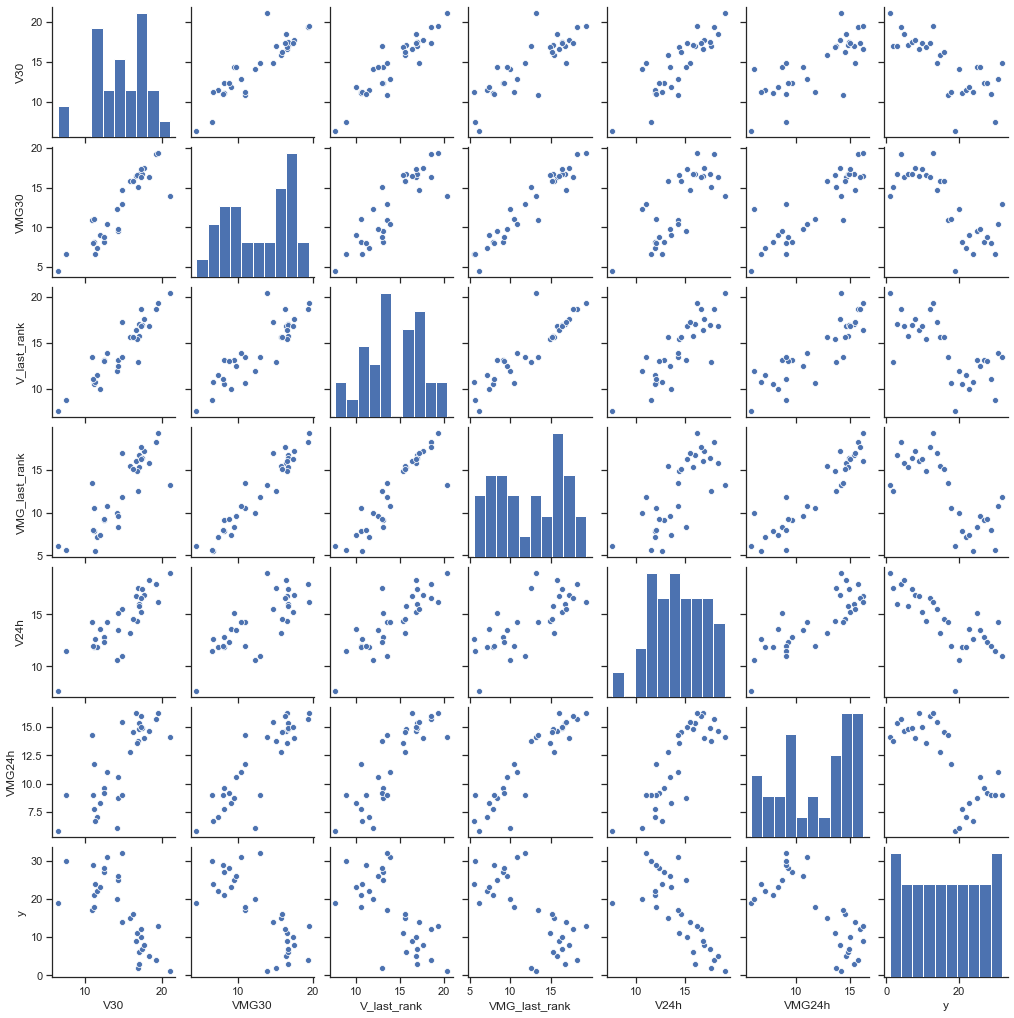

In [194]:
sns.set(style="ticks")
df_X_Y = pd.DataFrame(X_matrix_speed, columns = ['V30', 'VMG30', 'V_last_rank','VMG_last_rank', 'V24h', 'VMG24h' ])
df_X_Y['y'] = Y_ranking
sns.pairplot(df_X_Y, height = 2.0)
plt.show()

La corrélation permet d'identifier s'il existe un lien entre deux variables X et Y où X et Y peuvent se permuter. On calcule la corrélation de Pearson : indice qui permet de réfleter une relation linéaire entre les deux variables. 

$$ r_{Pearson}(X, Y) = \frac{cov(X,Y)}{\sqrt{var(X)} * \sqrt{var(Y)} } $$

In [195]:
df_X_Y.corr(method = 'pearson')

,V30,VMG30,V_last_rank,VMG_last_rank,V24h,VMG24h,y
V30,1.000000,0.899389,0.922662,0.835270,0.852482,0.769443,-0.738216
VMG30,0.899389,1.000000,0.873931,0.961277,0.762637,0.879684,-0.765607
V_last_rank,0.922662,0.873931,1.000000,0.905683,0.835601,0.855707,-0.690903
VMG_last_rank,0.835270,0.961277,0.905683,1.000000,0.741464,0.928787,-0.735873
V24h,0.852482,0.762637,0.835601,0.741464,1.000000,0.829172,-0.758433
VMG24h,0.769443,0.879684,0.855707,0.928787,0.829172,1.000000,-0.749056
y,-0.738216,-0.765607,-0.690903,-0.735873,-0.758433,-0.749056,1.000000


#### Régression linéaire entre le classement et les différentes vitesses 

La régression linéaire fait la liaison entre les variables X et Y mais elles ne peuvent être permutées : X étant la variable explicative et Y la variable à expliquer. En d'autres termes, X est la variable indépendante et Y la variable dépendante. 

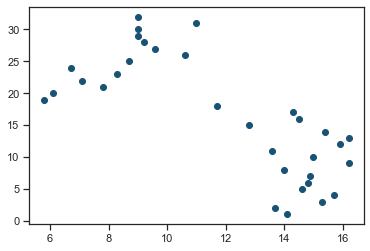

In [196]:
#-------------Préparation des données---------------#

#On récupère la VMG disponible depuis 24h (ici on aurait pu prendre une autre VMG).

X_VMG_24 = X_matrix_speed [:,-1] 
plt.scatter(X_VMG_24,Y_ranking, c="#1A5276")

In [197]:
#----------------Modèle de régression linéaire--------------# 
model = linear_model.LinearRegression()
model.fit(X_VMG_24.reshape(-1,1), Y_ranking)

print(model.coef_, model.intercept_)

[-2.07487932] 41.17809591781487


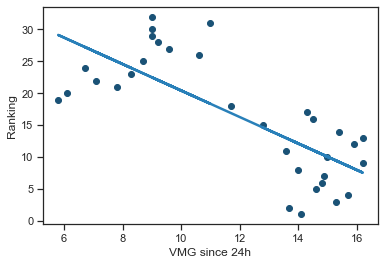

In [198]:
plt.scatter(X_VMG_24,Y_ranking, c="#1A5276") 
plt.plot(X_VMG_24,model.predict(X_VMG_24.reshape(-1,1)), c = "#2980B9",linewidth = 2.5)
plt.xlabel("VMG since 24h")
plt.ylabel("Ranking")
plt.show()

On devrait normalement retrouver le résultat suivant : Fonction affine décroissante. Ce résultat est retrouvé ici. Les meilleurs classés ont un ranking faible (1er du classement avec ranking = 1).  Les voiliers les mieux classés devait avoir les vitesse VMG les plus importantes.  

Mais ce n'était pas le cas sur la période du 24 au 26 novembre : 

- 25 novembre, rebondissement: l'un des foils d'un des favoris de la course se fissure à plusieurs endroits. Le skipper Thomas Ruyant est ne bénéficie plus de l'avantage du foil bâbord (cf.partie ci-dessous). Le bateau reste le en deuxième position et continue la course. Le coureur se repose alors sur son foil tribord qui est "statistiquement le plus important du monde" (source: https://www.sports.fr/voile/vendee-globe/vendee-globe-cest-lhecatombe-401045.html#item=2) 

- 26 novembre: les vitesses des meilleurs classés sont relativement faibles. Serait-il possible que ce soit lié à leur position ? Nous analyserons leurs positions

La vitesse du dernier classé Jémérie Beyou avec son voilier Charal est une des meilleures vitesses enregistrées depuis 24h. Faisant parti des favoris, ce dernier est retourné au point de départ un peu après le lancement de la course suite à des problèmes mécaniques. Il essaye sûrement de rattraper le retard accumulé par ce premier épisode de malchance. 

Il y a également une remontée du skipper Sébastien Simon (voilier Arkéa-Paprec)... à suivre


### Impact de la présence d'un foil sur le classement et la vitesse des voiliers 

La présence du foil est retrouvée dans table_features dans la colonne nommée Nombre de dérives. N'étant pas une passionnée de voiles, des petites recherches s'imposent sur ce qu'est un foil. 

foil : Plan porteur inclinable destiné aux embarcations susceptibles de déjauger (source : Larousse https://www.larousse.fr/dictionnaires/francais/foil/34369)

Un foil est un aileron incurvé placé sous une coque pouvant porter un bateau capable de déjauger. 

En d'autres termes, le foil est un appendice latéral élevant la coque au dessus de l'eau qui permet d'atteindre des pointes de vitesse. *Plus le vent est fort, plus les appendices (quilles ou foils), plus le bateau s'allège et gagne en vitesse et le bateau se soulève*  (source: Ouest France: https://www.ouest-france.fr/vendee-globe/vendee-globe-mais-au-fait-a-quoi-servent-les-foils-7044144).

Nous allons croire sur parole le média Ouest France sur l'avantage donné par un foil aux navires qui en sont composés. 

Nous remarquons dans les fiches techniques des différents voiliers que l'information sur le foil est intégrées dans la catégorie dérives. 

Qu'est ce qu'une dérive ? 
La dérive est une surface portante immergée permettant de résister à la dérive i.e. le dérapage latéral dû à l'effet du vent.  Le mot "dérive" est une contraction du terme plan anti-dérive. (source Wikipédia : https://fr.wikipedia.org/wiki/Dérive_(bateau).

Les foils qui prennent également part dans le monde du surf : https://www.dailymotion.com/video/x7xa55o


In [199]:
table_features

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


#### Prise en compte de la présence de foils sur les voiliers

In [200]:
foils_str = table_features["Nombre de dérives"]
foils_str

NEWREST - ART & FENÊTRES                       foils
PURE - Best Western®                               2
TSE -  4MYPLANET                                   2
Maître CoQ IV                                  foils
CHARAL                                         foils
LA MIE CÂLINE - ARTISANS ARTIPÔLE              foils
BUREAU VALLEE 2                                foils
ONE PLANET ONE OCEAN                               2
GROUPE SÉTIN                          2 asymétriques
BANQUE POPULAIRE X                                 2
APIVIA                                         foils
INITIATIVES-COEUR                              foils
MERCI                                              2
OMIA - WATER FAMILY                                2
PRB                                            foils
Compagnie du Lit / Jiliti                          2
MEDALLIA                                           2
SEAEXPLORER - YACHT CLUB DE MONACO             foils
STARK                                         

Dans le vecteur_foil, les données prennent trois valeurs : 
 - 'foils' : présence d'au moins 2 foils sur le voilier 
 - '2' : 2 étant le nombre de dérives sur le voilier
 - 'foiler'
 
Un foiler est un voilier monocoque ou multicoque qui utilise la portance dynamique de plusieurs foils (source : Wikipédia https://fr.wikipedia.org/wiki/Foiler)

On ne considère pas les modèles de dérive-foil, et on suppose que les valeurs numériques représentent le nombre de dérives et par conséquent la non présence de foils sur le bateau. 

In [201]:
vecteur_foil = foils_str.to_numpy()
vecteur_foil

array(['foils', '2', '2', 'foils', 'foils', 'foils', 'foils', '2',
       '2 asymétriques', '2', 'foils', 'foils', '2', '2', 'foils', '2',
       '2', 'foils', '2', 'foils', '2', 'foils', '2', 'foils', 'foils',
       'foils', '2', 'foils', 'foiler', '2', 'foils', 'foils', 'foils'],
      dtype=object)

Pour permettre l'analyse prenant en compte la présence de foils sur un voilier, on construit un vecteur à valeur binaire qui prend les valeurs suivantes:  
- 1 si présence de foils sur le voilier
- 0 sinon. 


In [202]:
#------------Nettoyage du vecteur_foil---------#
foils = []

for f in vecteur_foil: 
    if (f == 'foils') or (f == 'foiler'):
        #le voilier est composé de foils
        foils.append(1)
    else:
        #le voilier n'est composé que de dérives 
        foils.append(0)
print(foils)     

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1]


In [203]:
df_foils = pd.DataFrame (foils_str)
df_foils ['foils'] = foils
df_foils.reset_index(level = 0, inplace = True)
df_foils['index'] = df_foils['index'].apply(lambda x : x.capitalize())
table_name_dfoils = df_foils['index']

In [204]:
table_name_dfoils

0               Newrest - art & fenêtres
1                   Pure - best western®
2                       Tse -  4myplanet
3                          Maître coq iv
4                                 Charal
5      La mie câline - artisans artipôle
6                        Bureau vallee 2
7                   One planet one ocean
8                           Groupe sétin
9                     Banque populaire x
10                                Apivia
11                     Initiatives-coeur
12                                 Merci
13                  Omia - water family 
14                                   Prb
15             Compagnie du lit / jiliti
16                              Medallia
17    Seaexplorer - yacht club de monaco
18                                 Stark
19                                 Macsf
20                           Yes we cam!
21                       Time for oceans
22                    Campagne de france
23                        Prysmian group
24              

In [205]:
df_rank = pd.DataFrame(boat_ranking, columns = ['Bateau'])
df_rank['index'] = df_rank['Bateau'].apply(lambda x: x.capitalize())
df_rank['rank'] = df_rank.index
table_name_drank = df_rank['index']
del df_rank['Bateau']

In [206]:
dico_name = {}

for name in table_name_dfoils: 
    if name == 'Groupe sétin': 
        dico_name[name] = 'Groupe sétin'
        
    elif name == 'Groupe apicil':
        dico_name[name] = 'Groupe apicil'
    else: 
        
        debut = name[:4]

    
        for name_rank in table_name_drank: 
            if(debut.capitalize() == (name_rank[:4]).capitalize()):
                dico_name[name] = name_rank
                break
            
dico_name

{'Newrest - art & fenêtres': 'Newrest - art et fenetres',
 'Pure - best western®': 'Pure - best western hotels and resorts',
 'Tse -  4myplanet': 'Tse - 4myplanet',
 'Maître coq iv': 'Maître coq iv',
 'Charal': 'Charal',
 'La mie câline - artisans artipôle': 'La mie câline - artisans artipôle',
 'Bureau vallee 2': 'Bureau vallée 2',
 'One planet one ocean': 'One planet one ocean',
 'Groupe sétin': 'Groupe sétin',
 'Banque populaire x': 'Banque populaire x',
 'Apivia': 'Apivia',
 'Initiatives-coeur': 'Initiatives - coeur',
 'Merci': 'Merci',
 'Omia - water family ': 'Omia - water family',
 'Prb': 'Prb',
 'Compagnie du lit / jiliti': 'Compagnie du lit - jiliti',
 'Medallia': 'Medallia',
 'Seaexplorer - yacht club de monaco': 'Seaexplorer - yacht club de monaco',
 'Stark': 'Stark',
 'Macsf': 'Macsf',
 'Yes we cam!': 'Yes we cam !',
 'Time for oceans': 'Time for oceans',
 'Campagne de france': 'Campagne de france',
 'Prysmian group': 'Prysmian group',
 'La fabrique': 'La fabrique',
 'Linke

In [207]:
print(len(dico_name))

33


In [208]:
for cle, valeur in dico_name.items():
    df_foils= df_foils.replace(cle, valeur)

In [209]:
df_foils

,index,Nombre de dérives,foils
0,Newrest - art et fenetres,foils,1
1,Pure - best western hotels and resorts,2,0
2,Tse - 4myplanet,2,0
3,Maître coq iv,foils,1
4,Charal,foils,1
5,La mie câline - artisans artipôle,foils,1
6,Bureau vallée 2,foils,1
7,One planet one ocean,2,0
8,Groupe sétin,2 asymétriques,0
9,Banque populaire x,2,0


In [210]:
df_merge_rank = pd.merge(df_rank, df_foils, on = ['index'])

Le vecteur foils contient l'information pour tous les voiliers même ceux qui ont abandonné. 
On va donc supprimer les informations non nécessaire grâce au vecteur abandon qui recense les indices des voiliers/skippers ayant quitter la course.

In [211]:
print("Pour l'instant,", len(abandon), " skipper(s) a/ont abandonné l'aventure.")

Pour l'instant, 1  skipper(s) a/ont abandonné l'aventure.


In [212]:
#----------Suppression dans le dataframe---------#
for i in range(len(abandon)):
    df_merge_rank.drop(abandon[i], inplace = True)

In [213]:
df_merge_rank

,index,rank,Nombre de dérives,foils
0,Apivia,0,foils,1
1,Linkedout,1,foils,1
2,Yes we cam !,2,2,0
3,Prb,3,foils,1
4,Maître coq iv,4,foils,1
5,Bureau vallée 2,5,foils,1
6,Arkea paprec,6,foiler,1
7,Seaexplorer - yacht club de monaco,7,foils,1
8,Groupe apicil,8,2,0
9,Prysmian group,9,foils,1


In [214]:
len(X_VMG_24)

32

#### Impact de la présence d'un foil sur le classement et la vitesse du voiliers

Comme précédemment on utilise la VMG et la vitesse du bateau disponible depuis 24 heures, ainsi que du dernier classement disponible.  

On est dans le cas de variables qualitatives pour l'analyse des foils, i.e. qu'une variable ne prend que des modalités discrètes 

Il est possible d'étudier la relation entre une variables quantitative, ici la vitesse du voilier, et une variable qualitative, ici la présence de foils ou non. On peut représenter la relation graphiquement grâce à des box-plots. 

In [215]:
#------Représentation des données ------#
df_merge_rank['VMG24'] = X_VMG_24
df_merge_rank.drop(['Nombre de dérives'], axis='columns', inplace=True)


In [216]:
df_merge_rank

,index,rank,foils,VMG24
0,Apivia,0,1,14.1
1,Linkedout,1,1,13.7
2,Yes we cam !,2,0,15.3
3,Prb,3,1,15.7
4,Maître coq iv,4,1,14.6
5,Bureau vallée 2,5,1,14.8
6,Arkea paprec,6,1,14.9
7,Seaexplorer - yacht club de monaco,7,1,14.0
8,Groupe apicil,8,0,16.2
9,Prysmian group,9,1,15.0


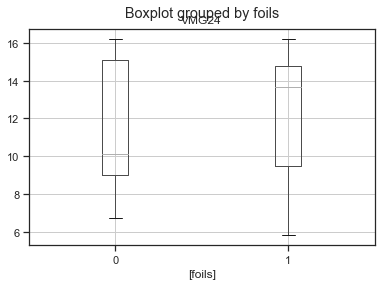

In [217]:
#boxplot : VMG 24 et présence de foils
boxplot = df_merge_rank.boxplot(column = ['VMG24'], by = ['foils'])

Avec les boxplots dessinées, on peut comparer la médiane de la VMG24 avec foil à la médiane de la VMG24 sans foil. 

**Résultats**

Entre le 24 et 26 nomvembre, la médiane de la VMG24 avec foil était supérieure à la médiance de la VMG24 sans foil. Ce qui nous laissaiit penser à première vue que la présence d'un foil donne une meilleure performance au voilier. 

Le 28 et 29 novembre,  ce résultat n'est plus vérifié, la médiane avec foil est inférieure à la médiane sans foil. Ce résultat est expliqué par la réduction des vitesses des. différents challengers les mieux classés (suite à leurs positions, à la météo...)

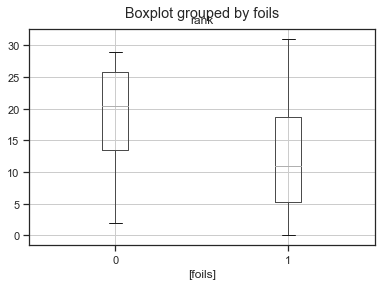

In [219]:
#boxplot : rang et présence de foils 
boxplot = df_merge_rank.boxplot(column = ['rank'], by = ['foils'])

Cependant en prenant en compte le classement, les voiliers des meilleurs classés sont composées de foils. En effet, la médiane du classement des navires possédant un foil est meilleure que la médiane du classement des voiliers sans foil. 
La présence de foil donne bien un avantage. 

## Rapprochement des données des voiliers avec le classement

In [220]:
table_features #df comprenant les caractéristiques des bateaux 

,Numéro de voile,Anciens noms du bateau,Architecte,Chantier,Date de lancement,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Nombre de dérives,Hauteur mât,Voile quille,Surface de voiles au près,Surface de voiles au portant,Skipper
NEWREST - ART & FENÊTRES,fra 56,"no way back, vento di sardegna",vplp/verdier,persico marine,2015-08-01,18.28,5.85,4.5,7.0,foils,29.0,monotype,320.0,570.0,Fabrice amedeo
PURE - Best Western®,fra 49,"gitana eighty, synerciel, newrest-matmut",bruce farr design,southern ocean marine (nouvelle zélande),2007-03-08,18.28,5.80,4.5,9.0,2,28.0,acier forgé,280.0,560.0,Romain attanasio
TSE - 4MYPLANET,fra72,"famille mary-etamine du lys, initiatives coeur...",marc lombard,mag france,1998-03-01,18.28,5.54,4.5,9.0,2,29.0,acier,260.0,580.0,Alexia barrier
Maître CoQ IV,17,safran 2 - des voiles et vous,verdier - vplp,cdk technologies,2015-03-12,18.28,5.80,4.5,8.0,foils,29.0,acier mécano soudé,310.0,550.0,Yannick bestaven
CHARAL,08,NaN,vplp,cdk technologies,2018-08-18,18.28,5.85,4.5,8.0,foils,29.0,acier,320.0,600.0,Jérémie beyou
LA MIE CÂLINE - ARTISANS ARTIPÔLE,fra 14,"ecover3, président, gamesa, kilcullen voyager-...",owen clarke design llp - clay oliver,hakes marine - mer agitée,2007-08-03,18.28,5.65,4.5,7.9,foils,29.0,basculante avec vérin,300.0,610.0,Arnaud boissieres
BUREAU VALLEE 2,18,banque populaire viii,verdier - vplp,cdk technologies,2015-06-09,18.28,5.80,4.5,7.6,foils,28.0,acier,300.0,600.0,Louis burton
ONE PLANET ONE OCEAN,esp 33,kingfisher - educacion sin fronteras - forum m...,owen clarke design,martens yachts,2000-02-02,18.28,5.30,4.5,8.9,2,26.0,acier,240.0,470.0,Didac costa
GROUPE SÉTIN,fra 71,"paprec-virbac2, estrella damm, we are water, l...",bruce farr yacht design,southern ocean marine (nouvelle-zélande),2007-02-02,18.28,5.80,4.5,9.0,2 asymétriques,28.5,basculante sur vérin hydraulique,270.0,560.0,Manuel cousin
BANQUE POPULAIRE X,fra30,macif - sma,verdier - vplp,cdk - mer agitée,2011-03-01,18.28,5.70,4.5,7.7,2,29.0,acier forgé,340.0,570.0,Clarisse cremer


On sait que la présence du foil améliore la vitesse du bateau, on va donc se concentrer sur les données suivantes : 
- la longueur, 
- la largeur, 
- le tirant d'eau, 
- le poids 
- la hauteur du mât, 
- la surface de voiles au près, 
- la surface de voiles au portant

In [221]:
colonnes_features = ['Longueur', 'Largeur', "Tirant d'eau",
                     "Déplacement (poids)",'Hauteur mât',
                     'Surface de voiles au près',
                     'Surface de voiles au portant']


features = table_features[colonnes_features]
features.reset_index(inplace = True)
features['index'] = features['index'].apply(lambda x : x.capitalize())

for cle, valeur in dico_name.items():
    features= features.replace(cle, valeur)

<ipython-input-221-1c4a876cd392>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['index'] = features['index'].apply(lambda x : x.capitalize())


In [222]:
df_features = pd.merge(df_rank, features, on = ['index'])

In [223]:
df_features

,index,rank,Longueur,Largeur,Tirant d'eau,Déplacement (poids),Hauteur mât,Surface de voiles au près,Surface de voiles au portant
0,Apivia,0,18.28,5.85,4.5,8.0,29.0,350.0,560.0
1,Linkedout,1,18.28,5.85,4.5,8.0,29.0,350.0,560.0
2,Yes we cam !,2,18.28,5.90,4.5,8.0,28.0,300.0,620.0
3,Prb,3,18.28,5.50,4.5,0.0,27.4,300.0,600.0
4,Maître coq iv,4,18.28,5.80,4.5,8.0,29.0,310.0,550.0
5,Bureau vallée 2,5,18.28,5.80,4.5,7.6,28.0,300.0,600.0
6,Arkea paprec,6,18.28,5.70,4.5,8.0,29.0,260.0,600.0
7,Seaexplorer - yacht club de monaco,7,18.28,5.70,4.5,7.6,29.0,290.0,490.0
8,Groupe apicil,8,18.28,5.85,4.5,8.5,29.0,350.0,610.0
9,Prysmian group,9,18.28,5.80,4.5,8.0,29.0,300.0,600.0


In [224]:
df_features['rank'] = df_features['rank'].apply(lambda x : x +1)
Y_rank = df_features['rank'].to_numpy()
Y_rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [225]:
X_features = (df_features.iloc[:, 2:]).to_numpy()
X_features

array([[ 18.28,   5.85,   4.5 ,   8.  ,  29.  , 350.  , 560.  ],
       [ 18.28,   5.85,   4.5 ,   8.  ,  29.  , 350.  , 560.  ],
       [ 18.28,   5.9 ,   4.5 ,   8.  ,  28.  , 300.  , 620.  ],
       [ 18.28,   5.5 ,   4.5 ,   0.  ,  27.4 , 300.  , 600.  ],
       [ 18.28,   5.8 ,   4.5 ,   8.  ,  29.  , 310.  , 550.  ],
       [ 18.28,   5.8 ,   4.5 ,   7.6 ,  28.  , 300.  , 600.  ],
       [ 18.28,   5.7 ,   4.5 ,   8.  ,  29.  , 260.  , 600.  ],
       [ 18.28,   5.7 ,   4.5 ,   7.6 ,  29.  , 290.  , 490.  ],
       [ 18.28,   5.85,   4.5 ,   8.5 ,  29.  , 350.  , 610.  ],
       [ 18.28,   5.8 ,   4.5 ,   8.  ,  29.  , 300.  , 600.  ],
       [ 18.28,   5.7 ,   4.5 ,   7.8 ,  27.  , 300.  , 600.  ],
       [ 18.28,   5.85,   4.5 ,   8.  ,  29.  , 300.  , 700.  ],
       [ 18.28,   5.6 ,   4.5 ,   7.7 ,  27.  , 300.  , 650.  ],
       [ 18.28,   5.5 ,   4.5 ,   7.7 ,  29.  , 365.  , 700.  ],
       [ 18.28,   5.4 ,   4.5 ,   7.7 ,  29.  , 330.  , 630.  ],
       [ 18.28,   5.8 ,  

Utilisation d'une régression linéaire pour identifier les caractéristiques les plus impactantes sur le classement. 

Ici on utilise une régression simple avec pour modèle : 
$ y = X \Theta + \epsilon$

où: 
- $y \in \mathbb{R}^n$ est le vecteur comportant le classement des voiliers, noté Y_rank plus bas. Il faut faire attention ici pour la compréhension des résultats, Y donne le classement i.e. le premier classé au aura l'étiquette 1 et le dernier aura l'étiquette 33. 
- $X \in \mathbb{R}^{n * p}$ est la matrice des variables dites explicatives, ici il s'agit des caractéristiques des voiliers (variables numériques) et qui sera noté X_features
- $\Theta$ : le vecteur  inconnu du modèle que l'on souhaite retrouver, donnée par model.coef_ et qui donnera les impacts des caractéristiques des voiliers sur le classement. 
- $\epsilon$ vecteur de bruit
- n = 33 i.e. le nombre de skippers 
- p = nombre de features considérées ici 7. 

In [226]:
model = linear_model.LinearRegression()
model.fit(X_features, Y_rank)

print('Le modèle de régression donne les coefficients suivants : ')
for i in range(len(colonnes_features)): 
    print('Pour ' + 
          colonnes_features[i] + 
          ' : ' + 
          str(round(model.coef_[i])))


Le modèle de régression donne les coefficients suivants : 
Pour Longueur : 0.0
Pour Largeur : -7.0
Pour Tirant d'eau : -0.0
Pour Déplacement (poids) : 1.0
Pour Hauteur mât : 1.0
Pour Surface de voiles au près : -0.0
Pour Surface de voiles au portant : 0.0


En fonction des classements, il peut avoir de légères modifications du vecteur Theta. En général,la largeur, le poids, mais aussi la hauteur du mât peuvent jouer sur le classement des voiliers. Et inversement, les coefficients tels que la longueur, le tirant d'eau et la surface des voiles au près et au portant n'impactent pas le rang. 

#### Longueur

*Plus le bateau est long et plus sa vitesse est maximum* 

Source : Le Chasse-marée, la revue du monde maritime 
https://www.chasse-maree.com/toutsavoir/les-formes-et-leurs-effets/

At first sight : 
Une de ces caractéristiques n'impactant pas le classement m'a paru étrange: la longueur. La longueur aurait dû avoir un impact sur la vitesse du bâteau tout comme la largueur. 

En reprenant les données, je me suis rendue compte que toutes les longueurs de voiliers sont égales à 18.28m. Ma première réflexion a été la suivante : une possible erreur dans la récupération des données. 

Que nenni, en repartant sur le site du Vendée Globe et en regardant une à une les fiches des différents voiliers. Tous ont une longueur de 18,28m. 



En effet, les voiliers utilisés pour la course sont tous des IMOCA 60. Ce sont des voiliers mesurant 60 pieds, soit 18.28m. dans notre système métrique. Ces navires sont comparés à des engins de formule 1 et sont destinés aux courses océaniques telles que le Vendée Globe ou encore la Route des Rhums. "Le développement de ces monocoques est intimement lié à ces courses". Source : Wikipédia https://fr.wikipedia.org/wiki/60_pieds_IMOCA

=> Il est donc normal que la longueur ne joue pas sur le classement. 

#### Largeur 

La largeur permet une meilleure stabilisation. 

*Si l’on favorise la longueur au détriment de la largeur, on obtient un bateau fin et rapide, mais sa stabilité de formes transversale ne sera pas très grande.*
        
        
*Si l’on conserve cette longueur en augmentant la largeur, le bateau gardera une grande part de son potentiel de vitesse et sa stabilité transversale sera meilleure.*

Source : Le Chasse-marée, la revue du monde maritime 
https://www.chasse-maree.com/toutsavoir/les-formes-et-leurs-effets/

En d'autres termes, plus un bateau est large, plus il sera stable et perdra de sa vitesse.  

Même si l'objectif principal des skippers est de terminer la course, le second objectif est d'espérer de battre le record de temps. Les skippers favoris ont cet objectif en tête: "Repousser les limites du temps" et faire mieux qu'Armel Le Cleac'H / Banque Populaire avec son record de 74 jours, 3 heures, 35 minutes et 46 secondes (soit 35 jours de mieux que Titouan Lamazou premier vainqueur du Vendée Globe de 1990). 
Source : Vidéo plaquette motion design 2020
https://www.vendeeglobe.org/fr/espace-documents/supports-de-communication

Avec cet objectif en tête, les skippers ont intérêt à choisir le bateau permettant de garder une vitesse optimale tout en ayant une stabilité minimum (on rappelle que le Vendée Globe est une course solo et sans aide). 

Le résultat de la petite régression pour la largeur est conforme à ce quia été énoncé plus haut. Le coeeficient associé est négatif, ce qui signifie que plus la largeur du voilier est importante, plus l'étiquette Y est forte (i.e. que le bateau est parmi les moins bons de la course. Inversement, plus la largeur du voilier est faible, plus l'étiquette Y sera faible et le voilier sera classé parmi les meilleurs. 

#### Poids

Le poids du voilier est également un indicateur important. Selon une fiche technique de conduite de bateau, le poids influe sur: 
- l'équilibre 
- la vitesse
- la trajectoire. 


Source : http://memovoile.free.fr/Technique/Moniteurs/Conduite-Manoeuvres/MemoVoile%20-%20Technique%20-%20Conduite%20-%209%20influence%20du%20poids%20sur%20la%20marche%20du%20bateau.pdf

*La position des poids modifie le volume immergé du bateau et influe sur la traînée de carène. [...] A partir d’une certaine vitesse, la traînée de carène est due à la résistance de vague (proportionnel au maître beau et au carré de la vitesse).* 


Plus la résistance est importante, moins le bateaur sera rapide. 


Augmentation de poids => Augmentation de résistance => Perte de vitesse

On retrouve ce résultat, le coefficient associé au poids est +1 ce qui signifie que plus le voilier est lourd, plus Y sera élevé. Y étant le rang, un Y  élevé corresspond à un moins bon classement. 

#### Hauteur du mât 

Pour faire un lien avec le point précédent, on peut dire que la hauteur du mât peut jouer sur le poids du bateau et donc sur la vitesse de ce dernier. En d'autres termes, plus le mât est haut, plus il y a de matières sur le bateau, et plus le bateau sera lourd. 

Avec des foils, le mât est aussi considéré comme *le maillon faible* des voiliers. Samantha Davies, skipper de cette édition, a annoncé : 
*"on peut pousser tellement avec les foils que l’on arrive aux charges de rupture du mât, parce que mon monotype avait été dessiné pour un bateau sans foils. Sur les bateaux, maintenant, on a des alarmes qui sonnent qui l’on charge trop le mât."* 

Cependant, le mât et les voiles restent nécessaires pour la traversée du Vendée Globe. Ces derniers associés au vent sont les véritables moteurs des voiliers. 

Les équipes (skippers et professionnels de la structure du voilier) en ayant ces contraintes en tête doivent réfléchir aux différentes caractéristiques de ces équipements. Ils doivent faire un compromis sur la hauteur du mât: *Samantha Davies a préféré faire un mat plus petit, en partant du principe que « lorsque l’on navigue, on est assez rapidement sous un ris et en moyenne sur le Vendée Globe, je n’ai pas toujours avec la grand-voile, car elle flappe et elle traîne… Et tout ce qui traîne en haut freine le bateau.*

Source: https://www.ouest-france.fr/vendee-globe/vendee-globe-quelles-sont-les-voiles-disponibles-sur-un-imoca-7044131



Dans l'analyse faite plus haut, le coefficient associé au mât est de 1, i.e. que plus le mât est haut, moins le voilier est bien classé. 

## Visualisation de la distance parcourue par un voilier

Pour que les trajectoires soient plus lisibles, on se limite aux trois premiers voiliers du classement.

In [227]:
#------------Récupération des trois premiers voiliers--------# 
top_ranking_boat = {}
for i in range(3): 
    top_ranking_boat [i] = df_merge_rank.iloc[i].loc['index']
    
top_ranking_boat

{0: 'Apivia', 1: 'Linkedout', 2: 'Yes we cam !'}

In [228]:
 for cle, value in couple.items(): 
        couple[cle] = dico_name [value]

In [229]:
top_ranking_skipper = {}
cpt= 0

for boat in top_ranking_boat.values(): 
    for cle, value in couple.items(): 
        if (boat == value): 
            top_ranking_skipper[cpt] = cle
            cpt = cpt + 1
top_ranking_skipper

{0: 'Charlie dalin', 1: 'Thomas ruyant', 2: 'Jean le cam'}

Pour avoir une bonne vision des progressions des différents voiliers, 
on récupére les latitudes et longitudes des classements journaliers de 21h. 

In [230]:
#liste des dates des classements disponibles 
date_ss_doublon = []

for date in dates: 
    if date[:8] not in date_ss_doublon: 
        date_ss_doublon.append(date[:8])
date_ss_doublon.reverse()


In [231]:
if (now.hour <= 21) : # i.e. que le classement de 21h n'est pas encore disponible
    del date_ss_doublon [-1]

In [232]:
#liste des objets date_time pour récupérer les longitudes et latitudes des dataframes
dates_object = []
for date in date_ss_doublon:
    dates_object.append(datetime.datetime.strptime(date + '21:00', '%Y%m%d%H:%M'))   


Avec le module Geopandas, on peut visualiser facilement la route des prises par les skippers. 
Ici, nous avons fait le choix de nous limiter à 3 voiliers pour une meilleure visualisation. 

In [233]:
# récupération des longitudes et latitudes des voiliers caractéristiques des bateaux
n1_long = []
n1_lat = []

n2_long = []
n2_lat = []

n3_long = []
n3_lat = []

for date in dates_object: 
    df_temp  = dico_df_ranking[date]
    serie_1 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[0]]
    serie_2 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[1]]
    serie_3 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[2]]
    
    n1_long.append(serie_1.Longitude)
    n1_lat.append(serie_1.Latitude)
    
    n2_long.append(serie_2.Longitude)
    n2_lat.append(serie_2.Latitude)
    
    n3_long.append(serie_3.Longitude)
    n3_lat.append(serie_3.Latitude)


In [234]:
def transfo_objectGPScoord_to_long_lat(list_coordonates): 
    res = []
    for i in list_coordonates: 
        temp = str(i)
        x = re.search("[0-9]{2}°[0-9]{2}.[0-9]{2}'[A-Z]",temp)
        res.append(x.group())
    return res

In [235]:
s1_long = transfo_objectGPScoord_to_long_lat(n1_long)
s1_lat = transfo_objectGPScoord_to_long_lat(n1_lat)
s2_long = transfo_objectGPScoord_to_long_lat(n2_long)
s2_lat = transfo_objectGPScoord_to_long_lat(n2_lat)
s3_long = transfo_objectGPScoord_to_long_lat(n3_long)
s3_lat = transfo_objectGPScoord_to_long_lat(n3_lat)

In [236]:
print(s1_long)

["04°47.42'W", "09°45.33'W", "14°49.51'W", "18°51.12'W", "24°47.85'W", "28°34.67'W", "30°38.11'W", "29°36.17'W", "29°22.05'W", "28°35.02'W", "29°42.46'W", "31°09.94'W", "30°42.82'W", "27°19.63'W", "23°43.82'W", "19°43.52'W", "17°09.03'W", "15°06.14'W", "13°00.37'W", "07°37.85'W", "01°52.59'E"]


In [237]:
def conversion_GPS_longlat(DMS):
    #DMS_lat = 48°51'31.0''N / DMS_long = 2°17'40.2''E
    #les arguments de cette fonction sont des chaines de caractères 
    
    #interpretation des coordonnes
    
    ##partir entière 48 / 2
    ##minutes 51 / 17
    ##secondes 31.0 / 40.2
    ##orientation N / E
    
    #récupération de la partie entière
    index_degree = DMS.find('°')
    partie_entiere = int(DMS[0: index_degree])
    
    #récupération de l'orientation N/S ou O/E
    orientation = DMS[-1]
    
    #récupération des minutes
    index_min = DMS.find(".")
    minute = float(DMS[index_degree + 1: index_min])/60
    
    #récupération des secondes
    index_second = DMS.find("'")
    second = float(DMS[index_min + 1: index_second])/3000
    
    long_lat = partie_entiere + minute + second
   
    #Mise en place de l'orientation 
    if orientation == 'S' or orientation == 'W': 
        long_lat = -1 * long_lat
    

    return long_lat 

In [238]:
Long_1 = [round(conversion_GPS_longlat(x),2) for x in s1_long]
Lat_1 = [round(conversion_GPS_longlat(x),2) for x in s1_lat]
Long_2 = [round(conversion_GPS_longlat(x),2) for x in s2_long]
Lat_2 = [round(conversion_GPS_longlat(x),2) for x in s2_lat]
Long_3 = [round(conversion_GPS_longlat(x),2) for x in s3_long]
Lat_3 = [round(conversion_GPS_longlat(x),2) for x in s3_lat]

In [239]:
#création de dataframes avec les trajectoires des différents skippers
df_trajectoire_skipper1 = pd.DataFrame(
    {'Latitude': Lat_1,
     'Longitude': Long_1})

df_trajectoire_skipper2 = pd.DataFrame(
    {'Latitude': Lat_2,
     'Longitude': Long_2})

df_trajectoire_skipper3 = pd.DataFrame(
    {'Latitude': Lat_3,
     'Longitude': Long_3})

In [240]:
#Définition des geoDataFrame
gdf1 = geopandas.GeoDataFrame(
    df_trajectoire_skipper1, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper1.Longitude, 
        df_trajectoire_skipper1.Latitude))


gdf2 = geopandas.GeoDataFrame(
    df_trajectoire_skipper2, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper2.Longitude, 
        df_trajectoire_skipper2.Latitude))


gdf3 = geopandas.GeoDataFrame(
    df_trajectoire_skipper3, 
    geometry=geopandas.points_from_xy(
        df_trajectoire_skipper3.Longitude, 
        df_trajectoire_skipper3.Latitude))



#### Section Geopandas 

La section suivante a été mise en commentaire. 
Le module geopandas n'étant pas stable, ce dernier n'a plus fonctionné avec le téléchargement du module Basemap. 
Un autre fichier est disponible sur mon GitHub pour voir les résultats de la prochaine cellule. 

In [241]:
#---------- Partie GeoPandas ---------# 


"""
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()
world.plot();

ax = world.plot(figsize = (30,15), color = 'lightblue')

gdf1.plot(ax=ax, color='steelblue')
gdf2.plot(ax=ax, color='cornflowerblue')
gdf3.plot(ax=ax, color='powderblue')

plt.title('Trajectory of the sailing vessels')

plt.show()


"""


"\nworld = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))\nworld.head()\nworld.plot();\n\nax = world.plot(figsize = (30,15), color = 'lightblue')\n\ngdf1.plot(ax=ax, color='steelblue')\ngdf2.plot(ax=ax, color='cornflowerblue')\ngdf3.plot(ax=ax, color='powderblue')\n\nplt.title('Trajectory of the sailing vessels')\n\nplt.show()\n\n\n"

Pour faire les projections, j'ai téléchargé le package basemap. Les deux packages Basemap et Geopandas ne sont pas compatibles. 
Le téléchargement de l'un entraine la suppression de fichiers nécessaires pour l'autre. En effet, lors de l'installation de Basemap, le module Geopandas ne marchait plus à cause de la suppression du module CRS de Pyproj. La désinstallation des deux modules ne m'a pas permis de réavoir un module geopandas fonctionnel. Vous trouverez donc ci-dessous une image du résultat de la cellule ci-dessus. 

<img src="img_geopandas.png">,


## Cartes avec les routes et projections

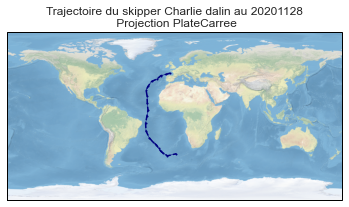

In [242]:
#Projection PlateCarree() _équivalente à la méthode Geopandas 
ax = plt.axes(projection=ccrs.PlateCarree())
    
ax.stock_img()

plt.plot(Long_1, Lat_1,
         color='navy', linewidth=0.5, marker='o', markersize = 1,
         transform=ccrs.Geodetic(),
         )

plt.plot(Long_1, Lat_1,
         color='navy', linestyle='--', markersize = 0.5,
         transform=ccrs.PlateCarree(),
         )

plt.title('Trajectoire du skipper ' + top_ranking_skipper [0] + ' au ' + date_ss_doublon[-1] + '\n Projection PlateCarree')
    
plt.show()

IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or Linear

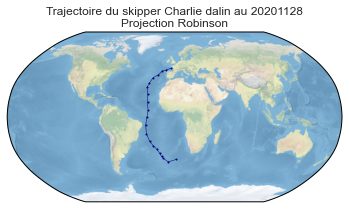

In [243]:
#Projection Robinson() 

ortho = ccrs.Robinson()
geo  = ccrs.Geodetic()

ax = plt.axes(projection=ortho)
    
ax.stock_img()

plt.plot(Long_1, Lat_1, color = 'navy', transform = geo, linewidth=0.5, marker='o', markersize = 1)
plt.title('Trajectoire du skipper ' + top_ranking_skipper [0] + ' au ' + date_ss_doublon[-1] + '\nProjection Robinson')
plt.show()

IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or LinearRing
IllegalArgumentException: Argument must be Polygonal or Linear

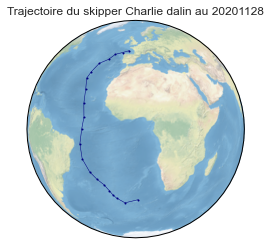

In [244]:
#Projection Orthographic() 
ax = plt.axes(projection=ccrs.Orthographic())
    
ax.stock_img()

plt.plot(Long_1, Lat_1,
         color='navy', linewidth=0.5, marker='o', markersize = 1,
         transform=ccrs.Geodetic(),
         )

plt.title('Trajectoire du skipper ' + top_ranking_skipper [0] + ' au ' + date_ss_doublon[-1])
    
plt.show()

## Analyse de séries temporelles 

### Différence entre VMG et la vitesse

Le graphe ci-dessus met en lumière la différence entre vitesse et VMG moyenne des classements.

**Point VMG**

La VMG ou Velocity Made Good ou encore vitesse utile est le gain dans le lit du vent, i.e. la projection de la vitesse surface sur l'axe du vent réel et correspond au meilleur compromis cap/vitesse.
Source : 
https://voilesetvoiliers.ouest-france.fr/equipement-entretien/electronique-embarquee/vmg-vmc-75cb0996-6757-9840-9c81-3bee13578586

*La VMG est une stratégie de navigation à la voile [...] et fait référence à l'optimisation entre la vitesse d'un voilier suivant la direction du vent et de la distance à parcourir. On parle aussi de compromis cap/vitesse [...] qui fait gagner le plus de distance sur l'axe du vent en unminimum de temps.* 
Source : Wikipédia https://fr.wikipedia.org/wiki/Velocity_made_good

Pour ceux qui n'ont encore compris (je fais partie de ces personnes), voixi un site expliquant la VMG:
https://www.bateaux.com/article/23553/vmg-une-aide-strategique-voile

La VMG combine alors les notions de vitesse sur l'eau et d'angle de remontée au vent. VMG = vitesse * cos (angle avec le vent) 

In [245]:
dates_object_total = []
for date in dates:
    dates_object_total.append(datetime.datetime.strptime(date, '%Y%m%d_%H%M%S'))   

dates_object_total.reverse()

In [246]:
### Visualisation de la vitesse 


#Vitesse moyenne de tous les bateaux depuis 24h 
#VMG moyenne de tous les bateaux depuis 24h 

#Prise en compte tous les classements (toutes les dates et toutes les heures de publications)
serie_speed24_mean = []
serie_VMG24_mean = []

for date in dates_object_total: 
    if date not in dico_df_ranking: 
        continue
    else: 
        df_temp  = dico_df_ranking[date]
        serie_speed24_mean.append (df_temp['Vitesse depuis 24h '].mean())
        serie_VMG24_mean.append(df_temp['VMG depuis 24h '].mean())
    
#serie_speed24_mean.reverse()
#serie_VMG24_mean.reverse()


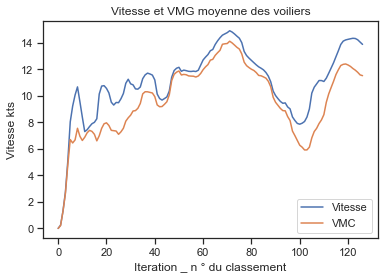

In [247]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(serie_speed24_mean)
plt.plot(serie_VMG24_mean)

plt.ylabel('Vitesse kts')
plt.xlabel('Iteration _ n ° du classement')
#plt.tick_params(axis = 'x', length = 0)

#ax.set_xticklabels(dates_light)

plt.title('Vitesse et VMG moyenne des voiliers')
plt.legend(['Vitesse', 'VMC'], loc='lower right')
plt.show()

On peut alors récupérer l'angle moyen de remontée au vent des voiliers. 

In [248]:
#Calcul des angles 

##Attention les angles sont en radians qui doivent être convertis en degrés 

angle_vent_mean = []
for i in range(len(serie_speed24_mean)):
    if serie_speed24_mean[i] == 0 : 
        angle_vent_mean.append(0)
    else : 
        
        angle_vent_mean.append(round(math.acos(serie_VMG24_mean[i] /serie_speed24_mean[i]) *180/  math.pi)) 

In [249]:
print(angle_vent_mean)

[0, 29, 9, 16, 19, 33, 46, 48, 45, 43, 38, 20, 14, 16, 22, 27, 37, 46, 45, 43, 41, 41, 39, 38, 39, 42, 42, 42, 42, 42, 38, 35, 32, 30, 28, 26, 27, 28, 28, 28, 27, 23, 20, 18, 17, 16, 14, 12, 13, 13, 12, 12, 13, 13, 14, 14, 15, 15, 16, 18, 20, 19, 20, 19, 19, 20, 21, 21, 18, 18, 19, 19, 19, 19, 20, 19, 20, 20, 20, 19, 19, 18, 18, 19, 18, 17, 16, 15, 15, 17, 18, 18, 19, 20, 20, 23, 25, 29, 31, 33, 37, 39, 43, 45, 47, 48, 47, 46, 45, 43, 39, 33, 30, 29, 27, 26, 27, 28, 29, 29, 30, 31, 33, 34, 34, 35, 34]


Si la méthode utilisée est bonne, les angles moyens calculés sont faibles. 
Les voiliers étaient au plus près du vent où l'allure correspondante est le **plus serré**. Les voiliers avançaient jusqu'à présent avec un vent debout (i.e. avec le vent de face). Il s'agit d'une zone inconfortable et difficile de navigation  où le bateau a dû mal à avancer (voiles qui peuvent faseyer). Les voiliers ont dû louvoyer (tirer des bords) pour pouvoir progresser dans leur navigations i.e. effectuer des virements de bors pour se rendre d'un point à un autre et remonter le vent. En d'autres termes c'est faire une série de zigzags pour contrer la force du ventet atteindre le point fixé. 

Je me suis beaucoup aidée des sources suivantes : 
https://fr.wikipedia.org/wiki/Allure_(marine)
https://blog.cannesyachtingfestival.com/que-signifie-louvoyer/


En repartant sur le site du Vendée Globe, et plus spécifiquement sur la cartographie, on peut simuler les différentes positions des skippers et de leurs navires. 
On peut se rendre compte des zigzags effectuer par les voiliers à chaque incrémentation (changement de date et d'heures) de la cartographie. 

https://www.vendeeglobe.org/fr/cartographie

### Visualisation de la vitesses des différents skippers

In [250]:
#------------Récupération classement dans un dictionnaire--------# 
top_ranking_boat_all = {}
for i in range(32): 
    top_ranking_boat_all [i] = df_merge_rank.iloc[i].loc['index']
    
top_ranking_boat_all[32] = "Corum l'épargne"


In [251]:
top_ranking_skipper_all = {}
cpt= 0

for boat in top_ranking_boat_all.values(): 
    for cle, value in couple.items(): 
        if (boat == value): 
            top_ranking_skipper_all[cpt] = cle
            cpt = cpt + 1


In [252]:
list_ranking_skipper = []
for cle, value in top_ranking_skipper_all.items(): 
    list_ranking_skipper.append(value)


In [253]:

Vitesses = pd.DataFrame()
for date in dates_object_total: 
    if date not in dico_df_ranking: 
        continue
    else: 
        liste_temp = []
        for cle,boat in top_ranking_boat_all.items(): 
            
            df_temp  = dico_df_ranking[date]
            temp = df_temp.loc[df_temp['Bateau'] == boat]
            x = temp['Vitesse depuis 24h ']
            if (re.search("[0-9]{2}.[0-9]",str(x)) == None) : 
                liste_temp.append(float(re.search("[0-9].[0-9]",str(x)).group()))
            else:
                liste_temp.append(float(re.search("[0-9]{2}.[0-9]",str(x)).group()))
                
            
                                      
            #liste_temp.append(temp['Vitesse depuis 24h '])
    
    Vitesses [date] = liste_temp
        #serie_2 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[1]]
        #serie_3 = df_temp.loc[df_temp['Bateau'] == top_ranking_boat[2]]


In [254]:
Vitesses

,2020-11-08 12:02:00,2020-11-08 14:00:00,2020-11-08 15:00:00,2020-11-08 17:00:00,2020-11-08 21:00:00,2020-11-09 04:00:00,2020-11-09 08:00:00,2020-11-09 11:00:00,2020-11-09 14:00:00,2020-11-09 17:00:00,...,2020-11-28 04:00:00,2020-11-28 08:00:00,2020-11-28 11:00:00,2020-11-28 14:00:00,2020-11-28 17:00:00,2020-11-28 21:00:00,2020-11-29 04:00:00,2020-11-29 08:00:00,2020-11-29 11:00:00,2020-11-29 14:00:00
0,0.0,0.0,1.4,2.8,5.4,9.6,11.2,11.8,12.2,10.6,...,14.4,16.1,15.7,15.5,17.2,18.6,18.7,18.6,18.8,19.0
1,0.0,0.2,1.4,2.9,5.5,9.5,11.3,12.2,12.7,10.9,...,10.5,11.5,13.0,14.7,16.7,18.6,19.4,19.1,19.1,17.6
2,0.0,0.2,1.1,2.3,4.7,7.6,9.0,10.1,10.8,9.9,...,14.6,14.8,15.0,14.8,14.9,15.5,16.0,16.3,15.8,16.0
3,0.0,0.2,1.2,2.5,5.3,9.5,11.0,11.6,12.1,10.8,...,17.2,17.9,18.4,18.7,19.3,20.0,20.1,19.3,18.6,17.9
4,0.0,0.2,1.2,2.5,5.0,8.6,10.1,10.8,11.4,10.2,...,17.0,17.4,17.6,17.5,18.2,18.9,19.4,19.4,19.2,18.3
5,0.0,0.3,1.3,2.7,5.3,9.3,10.8,11.8,12.4,10.7,...,19.4,19.8,20.0,19.9,19.8,19.7,18.0,16.9,16.2,15.8
6,0.0,0.2,1.3,2.6,5.0,9.1,10.8,11.5,11.9,10.5,...,17.1,18.4,19.2,19.4,19.8,20.1,19.8,19.6,18.5,17.5
7,0.0,0.3,1.3,2.7,4.6,10.1,10.8,11.4,11.8,10.3,...,16.4,17.1,17.8,18.0,18.2,18.6,18.3,18.2,17.4,16.9
8,0.0,0.2,1.1,2.3,4.7,7.8,9.1,10.0,10.6,9.8,...,17.4,18.0,18.5,18.9,19.3,19.7,18.2,17.7,17.2,16.8
9,0.0,0.2,1.1,2.4,4.7,8.2,9.5,10.4,11.3,10.1,...,17.4,17.5,17.5,17.7,17.6,16.9,15.9,15.7,15.4,15.2


In [255]:
Vitesses_transposed = Vitesses.T

In [256]:
Vitesses_transposed.columns = list_ranking_skipper

In [257]:
Vitesses_transposed

,Charlie dalin,Thomas ruyant,Jean le cam,Kevin escoffier,Yannick bestaven,Louis burton,Sébastien simon,Boris herrmann,Damien seguin,Giancarlo pedote,...,Pip hare,Fabrice amedeo,Clément giraud,Alexia barrier,Miranda merron,Ari huusela,Sébastien destremau,Kojiro shiraishi,Jérémie beyou,Nicolas troussel
2020-11-08 12:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-08 14:00:00,0.0,0.2,0.2,0.2,0.2,0.3,0.2,0.3,0.2,0.2,...,0.2,0.2,0.2,0.6,0.2,0.2,0.2,0.2,0.2,0.2
2020-11-08 15:00:00,1.4,1.4,1.1,1.2,1.2,1.3,1.3,1.3,1.1,1.1,...,1.0,1.2,0.9,2.6,0.9,0.9,0.9,1.1,1.4,1.3
2020-11-08 17:00:00,2.8,2.9,2.3,2.5,2.5,2.7,2.6,2.7,2.3,2.4,...,2.0,2.2,1.8,4.4,2.0,1.8,1.9,2.5,3.0,2.8
2020-11-08 21:00:00,5.4,5.5,4.7,5.3,5.0,5.3,5.0,4.6,4.7,4.7,...,4.2,1.2,3.9,6.5,4.1,3.8,3.9,5.1,5.8,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28 21:00:00,18.6,18.6,15.5,20.0,18.9,19.7,20.1,18.6,19.7,16.9,...,11.9,14.8,13.4,13.3,12.7,11.8,10.7,11.2,7.2,0.0
2020-11-29 04:00:00,18.7,19.4,16.0,20.1,19.4,18.0,19.8,18.3,18.2,15.9,...,12.8,15.6,13.8,13.4,12.4,12.0,11.4,12.7,9.1,0.0
2020-11-29 08:00:00,18.6,19.1,16.3,19.3,19.4,16.9,19.6,18.2,17.7,15.7,...,12.7,16.2,14.0,13.5,12.6,12.1,11.6,13.6,9.8,0.0
2020-11-29 11:00:00,18.8,19.1,15.8,18.6,19.2,16.2,18.5,17.4,17.2,15.4,...,12.8,15.7,13.7,13.1,12.5,12.1,11.7,13.9,10.4,0.0


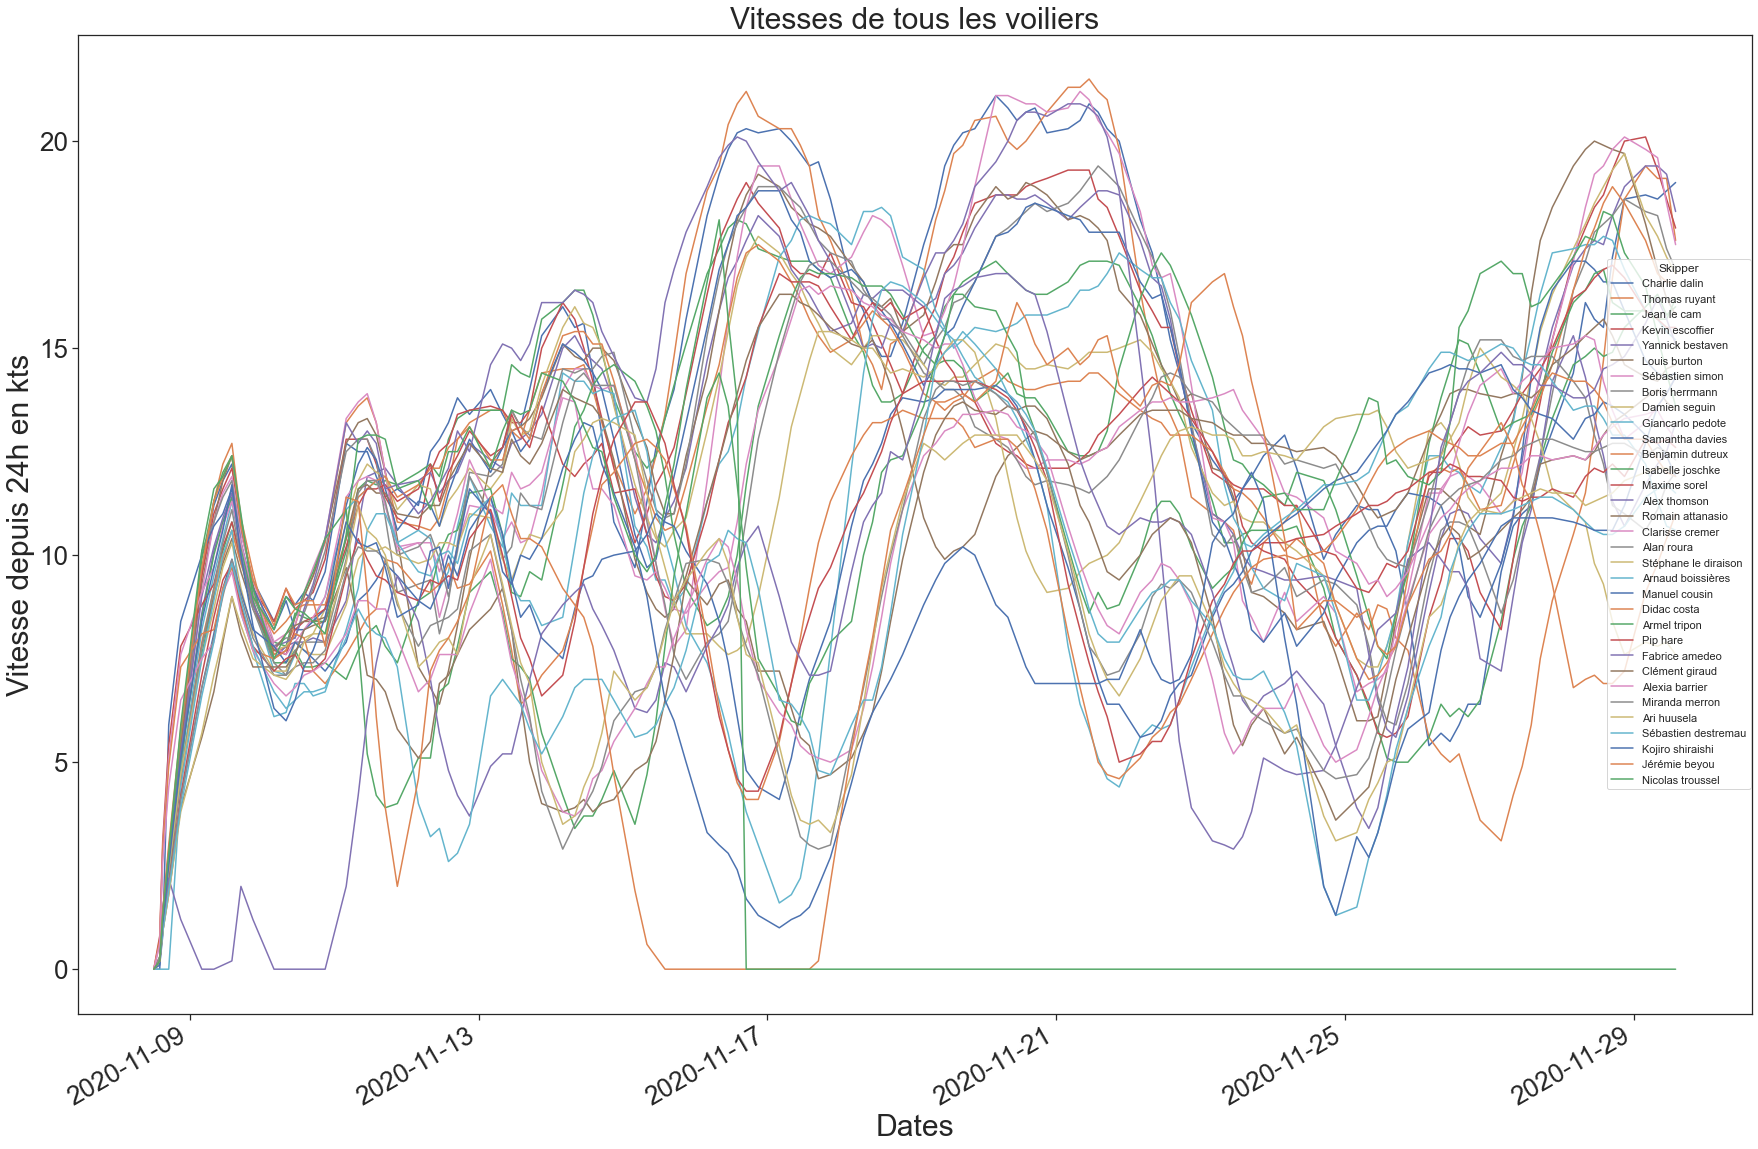

In [258]:
#Graphique de toutes les vitesses 
ax = Vitesses_transposed.plot(legend = False, figsize = (30,20), fontsize = 26); 
ax.set_ylabel('Vitesse depuis 24h en kts', fontdict={'fontsize':30})
ax.set_xlabel('Dates', fontdict={'fontsize':30})
ax.set_title('Vitesses de tous les voiliers', fontdict={'fontsize':30})

ax.legend( loc="center right",        
           borderaxespad=0.1,         
           title="Skipper");

### Concentration des vitesses des "cas particuliers"

Chaque jour du Vendée Globe est une aventure ! De nombreux évènements sont survenus depuis le début de cette course. Nous allons essayer de les identifier aux niveaux des courbes de vitesses. 

#### Cas Nicolas Troussel 

En reprenant, le graphe ci-dessus, on peut identifier l'abandon du skipper Nicolas Troussel (Tracé vert). 

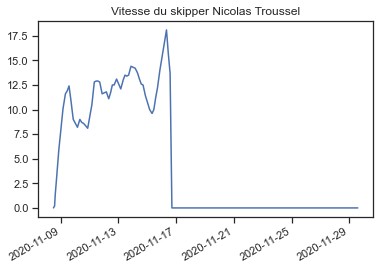

In [259]:
Vitesses_transposed['Nicolas troussel'].plot(title = 'Vitesse du skipper Nicolas Troussel'); 

*Sans mât, impossible de continuer à naviguer*

Le 16 novembre, le skipper Nicolas Troussel du bateau CORUM l'épargne a dû abandonné la course suite à un incident. Son mât s'est fracturé au large du Cap-Vert. 

Source:
https://www.lemonde.fr/sport/article/2020/11/16/vendee-globe-nicolas-troussel-a-demate_6059893_3242.html


#### Cas Jérémie Beyou  

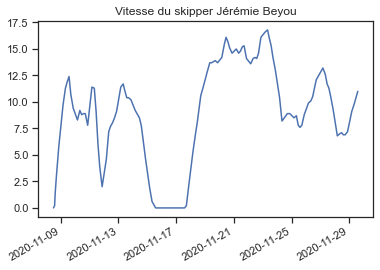

In [260]:
Vitesses_transposed['Jérémie beyou'].plot(title = 'Vitesse du skipper Jérémie Beyou'); 


Le skippeur Jérémie Beyou du bateau Charal a dû retourner sur les lieux du départ de la course : les Sables d'Olonne suite à une avarie (collission d'un safran avec un objet non identifié. Le skippeur et toute son équipe n'ont pas abandonné, ils ont pu réparer et vérier le voilier pour un nouveau départ. 

Source : https://www.lequipe.fr/Voile/Actualites/Jeremie-beyou-victime-d-une-avarie-sur-le-vendee-globe-fait-demi-tour-vers-les-sables-d-olonne/1193357


Dernier du classement, Beyou n'abandonne pas la course. Le 25 novembre, Beyou avait un retard de 3080 miles sur le premier de la course. Cet écart s'est réduit de 134 miles en 24 heures passant à 2955 miles. 
Source : https://www.actunautique.com/2020/11/vendee-globe-et-pendant-ce-temps-la-jeremie-beyou-a-repris-134-milles-en-24-heures.html


Serait-il possible que Beyou puisse rattraper sont retard et remonter dans le classement ? A suivre...  

#### Cas Alex Thomson 

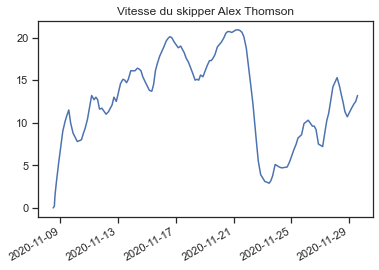

In [261]:
Vitesses_transposed['Alex thomson'].plot(title = 'Vitesse du skipper Alex Thomson'); 

Alex Thomson avait dominé la course pendant 5 jours. Cependant suite à des problèmes de structures identifiés, la progression du skipper est impactée. La vitesse du voilier Hugo Boss mené par Alex Thomson s'est réduite le 21 novembre pour consolider les problèmes structurels sur une poutre. Le skipper a tenté de consolider le bateau pendant plusieurs jours. Plein d'espoir, le skipper croit encore à la victoire. 

Coup de théâtre, dans la nuit du vendredi 27 et samedi 28 novembre,  le skipper a été victime d'un incident : le voilier Hugo Boss a possiblement percuté du matériel de pêche entranant de gros dégâts sur le système de gouvernail, et une avarie de safran. La réparation en mer est impossible. Le skipper Alex Thomson est contraint d'abandonner la course (samedi 28 après-midi). 

Bizarrement le classement du 29 novembre de 14h n'est pas encore actualisé concernant l'abandon de Alex Thomson. (à suivre concernant les résultats). 

#### Les plus jeunes de la course  

Alan roura est classée à la 18 place.
Clarisse cremer est classée à la 17 place.
Benjamin dutreux est classée à la 12 place.


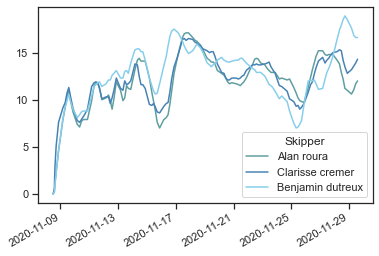

In [262]:
jeunes = ['Alan roura', 'Clarisse cremer', 'Benjamin dutreux']
colors_j = ['cadetblue', 'steelblue', 'skyblue']
cpt = 0

for jeune in jeunes: 
    Vitesses_transposed[jeune].plot(color =colors_j[cpt]); 
    cpt = cpt+1 
    print(jeune + ' est classée à la ' + str(list_ranking_skipper.index(jeune)+1)  + ' place.')

plt.legend(title="Skipper");

Alan Roura est le cadet de la course. Agé de 27 ans, il est déjà à sa deuxième participation du Vendée Globe. 

Benjamin Dutreux et Clarisse Cremer, tous deux agés de 30 ans, participent pour la première fois à la course. Belle performance pour une première. 

#### Les drôles de dames 

Cette année, la course a enregistrée un record de participation féminine. Elles sont au nombre de 6 cette années contre maximum 2 les années précédentes. Elles seront 5 au total à prendre le départ et sont toutes jusqu'à présent dans la course. 

In [263]:
dames = ['Alexia barrier','Clarisse cremer', 'Samantha davies', 'Isabelle joschke', 'Miranda merron']
colors = ['slateblue','blueviolet', 'plum', 'indigo', 'orchid']

Alexia barrier est classée à la 27 place.
Clarisse cremer est classée à la 17 place.
Samantha davies est classée à la 11 place.
Isabelle joschke est classée à la 13 place.
Miranda merron est classée à la 28 place.


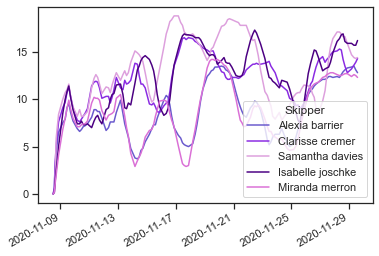

In [264]:
cpt = 0
for dame in dames: 
    Vitesses_transposed[dame].plot(color = colors[cpt]); 
    cpt = cpt+1
    print(dame + ' est classée à la ' + str(list_ranking_skipper.index(dame)+1)  + ' place.')

plt.legend(title="Skipper");

Ces dernières ne déméritent pas.
On espère qu'elles tiendront jusqu'au bout :)

#### Une spécificité de cette année

En plus d'une participation plus élevée de femmes cette année, il y a une autre spécificité parmi les skippers: un couple. Romain Attanasio et Samantha Davies sont compagnons et ont choisi de s'aventurer dans la course (bien évidemment séparément). 

Source : https://www.leparisien.fr/sports/vendee-globe-romain-attanasio-samantha-davies-concurrents-en-mer-couple-a-la-ville-07-11-2020-8407099.php

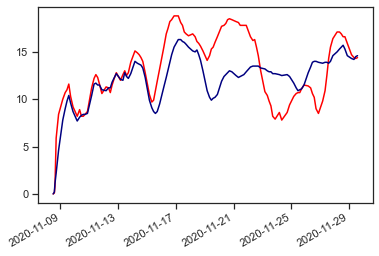

In [265]:
Vitesses_transposed['Samantha davies'].plot(color = 'red'); 
Vitesses_transposed['Romain attanasio'].plot(color = 'navy'); 

In [267]:
rank_Sam = list_ranking_skipper.index('Samantha davies')+1
rank_Rom = list_ranking_skipper.index('Romain attanasio')+1

print('Samantha Davies est classée à la ' 
      + str(rank_Sam) 
      + 'e place et Romain Attanasio est classé à la '
      + str(rank_Rom) + 'e place.')

if(rank_Sam < rank_Rom ): 
    print('=> La dame devance ! ')

Samantha Davies est classée à la 11e place et Romain Attanasio est classé à la 16e place.
=> La dame devance ! 


Quel que ce soit le résultat final, Ruben, leur fils pourra être fier de ses parents. 

Il est bien le seul (jusqu'à présent) à dire que ses deux parents ont fait le Vendée Globe. 

 

#### Le top 3 (pour l'instant)

Petit zoom sur le trio de tête qui est composé de : 


In [268]:
for cle, value in top_ranking_skipper.items(): 
    if cle == 0 : 
        print('A la première place : ' + value )
    elif cle == 1 : 
        print('A la seconde place : ' + value )
    else:
        print('A la troisièmre place : ' + value)

A la première place : Charlie dalin
A la seconde place : Thomas ruyant
A la troisièmre place : Jean le cam


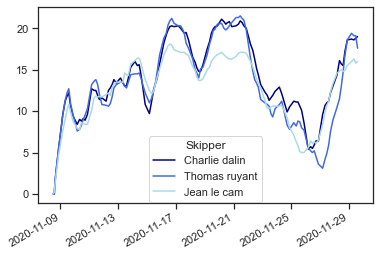

In [269]:
#Graphique de la vitesses du top 3
ax1 = Vitesses_transposed[top_ranking_skipper[0]].plot(color = 'navy'); 
ax2 = Vitesses_transposed[top_ranking_skipper[1]].plot(color = 'royalblue'); 
ax3 = Vitesses_transposed[top_ranking_skipper[2]].plot(color = 'lightblue'); 



ax1.legend( loc="lower center",        
           borderaxespad=0.1,         
           title="Skipper");

Parmi ce trio de tête, on a le doyen de la course, Jean Le Cam à bord de son voilier Yes, we cam ! (on notera le jeu de mots). Agé de 61 ans, c'est la 5ème participation à l'aventure Vendée Globe. 
Bien que ce soit une course en solo, le doyen a ramené "14 passagers clandestins" faire le tour du monde avec lui :)

Source : https://www.ouest-france.fr/vendee-globe/video-vendee-globe-jean-le-cam-presente-les-14-passagers-clandestins-qui-l-accompagnent-7064647

Il faut également préciser que le bateau Yes, le Cam ! est un bateau de 13 ans et sans foil (encore plus de respect pour ce doyen). 

On lui souhaite une très belle aventure ainsi qu'à ses 14 compagnons  ! 

## Conclusion

La majorité des voiliers ont dépassé l'équateur. Ce jeudi, le leader de la course Charlie Dalin a aperçu un albatros : signe de l'arrivée dans des eaux loins des côtes. 

Les skippers font face aux mers du sud et donc à des zones dont les conditions de navigation sont bien plus difficiles. 

Plus précisément, "Les 40ème rugissants" est un nom donné à la zone située entre le 40e et le 50e parallèle, entre la fin de l'Océan Indien et le début de l'océan Austral. Cette zone est composée de vents très violents dus à l'absence de terres pour les ralentir. 

Les vents venant de l'ouest pourraient être un moyen de traverser rapidement l'Océan Indien, mais représentent un réel danger pour les skippers :  
*Sous 40 degrés, il n'y a plus de lois, mais sous 50 degrés il n'y a plus de Dieu* (dicton marin).

Sources : https://www.bateaux.com/article/30114/passages-mer-plus-redoutes-marins

https://escales.ponant.com/40e-rugissants-50e-hurlants/


Le Vendée Globe est une course pleine de péripéties et de rebondissements. L'aventure est encore loin d'être terminée !